In [78]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import optuna
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [79]:
def trans_age(data):
    data=pd.qcut(data,q=4,labels=False)
    return data
def trans_oldpeak(data):
    data=np.asarray(data).astype(int)
    return data
def make_eval_graph(data):
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(data['loss'],label='loss')
    ax.plot(data['val_loss'],label='val_loss')
    ax.set_title('loss vs val_loss')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    plt.legend(loc=(1.05,0.8))


In [80]:
df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [81]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [83]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [84]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**No missing value in this dataset**

## EDA

Text(0.5, 1.0, 'Target Class Distribution')

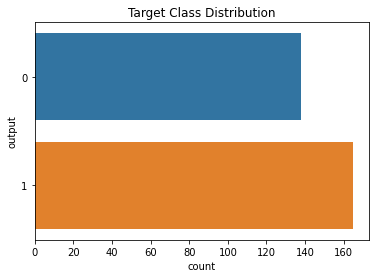

In [85]:
fig,ax=plt.subplots()
sns.countplot(data=df,y='output')
ax.set_title('Target Class Distribution')

**The target class is quite balanced**

Text(0.5, 1.0, 'Gender distribution')

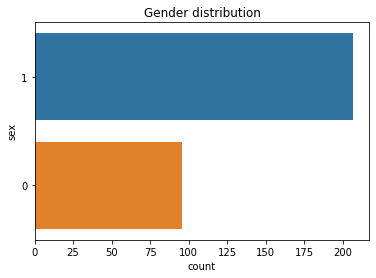

In [86]:
fig,ax=plt.subplots()
sns.countplot(data=df,y='sex',order=df['sex'].value_counts().index)
ax.set_title('Gender distribution')

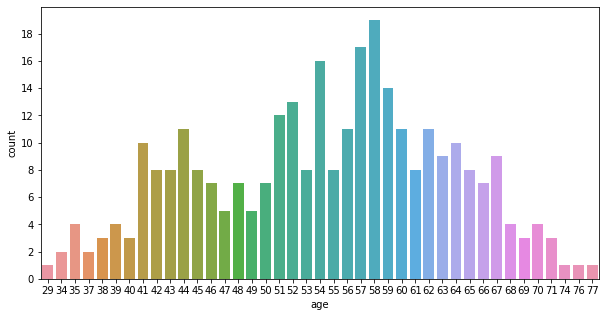

In [87]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df['age'])
ax.set_yticks(range(0,20,2))

**most of participants are aged between 50-65 years**

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

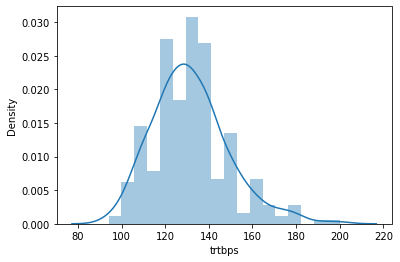

In [88]:
sns.distplot(df['trtbps'])

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

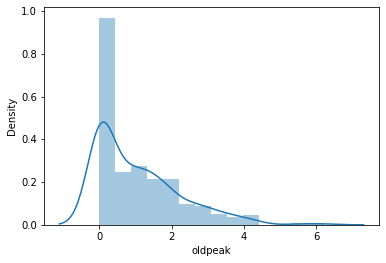

In [89]:
sns.distplot(df['oldpeak'])

<AxesSubplot:xlabel='chol', ylabel='Density'>

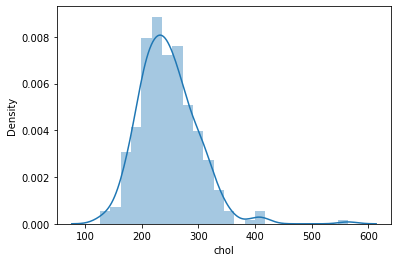

In [90]:
sns.distplot(df['chol'])

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

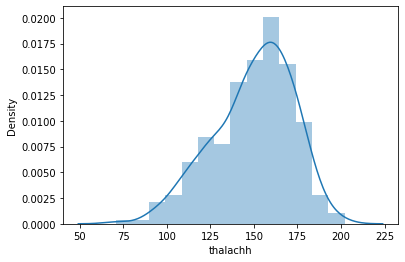

In [91]:
sns.distplot(df['thalachh'])

<AxesSubplot:>

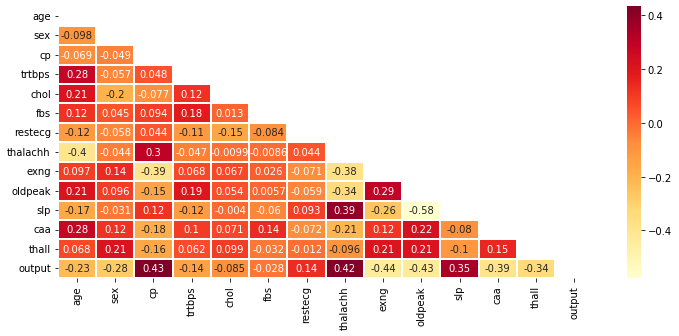

In [92]:
plt.figure(figsize=(12,5))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask=mask,cmap='YlOrRd',linewidth=2,annot=True)

## Feature Engineering and Data Preprocessing

**Splitting data for training and testing**

In [93]:
X=df.drop('output',axis=1)
y=df['output']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [95]:
#convert oldpeak dtype to interger
X_train['oldpeak'] = trans_oldpeak(X_train['oldpeak'])
X_test['oldpeak'] = trans_oldpeak(X_test['oldpeak'])
#binning age
X_train['age']=trans_age(X_train['age'])
X_test['age']=trans_age(X_test['age'])
#make new feature age*chol
X_train['cholAge']=X_train['age']*X_train['chol']
X_test['cholAge']=X_test['age']*X_test['chol']

**Feature scaling** 

In [98]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

## Training and testing model

In [114]:
param_svm={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
model_svm=GridSearchCV(SVC(),param_grid=param_svm,cv=10,n_jobs=-1,verbose=1)
model_svm.fit(X_train_sc,y_train)
pred_svm=model_svm.predict(X_test_sc)
acc_svm=accuracy_score(y_test,pred_svm)
f1_svm=f1_score(y_test,pred_svm)
print(classification_report(y_test,pred_svm))


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    3.3s finished


In [115]:
param_lr= { 'C' : [100,10,1,0.1,0.01],
    'penalty':['l1','l2'],    
    'solver' : ['liblinear'],
    'max_iter' : [100, 200,300,500]
    }

model_lr=GridSearchCV(LogisticRegression(),param_grid=param_lr,cv=8,n_jobs=-1)
model_lr.fit(X_train_sc,y_train)
pred_lr=model_lr.predict(X_test_sc)
acc_lr=accuracy_score(y_test,pred_lr)
f1_lr=f1_score(y_test,pred_lr)
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [23]:
def objective_rf(trial):
    criterion_list=['gini','entropy']
    n_estimators= trial.suggest_int('n_estimators',1000,1500)
    max_depth=int(trial.suggest_loguniform('max_depth',2,50))
    min_samples_leaf=trial.suggest_int('min_samples_leaf',2,10)
    min_samples_split=trial.suggest_int('min_samples_split',2,10)
    criterion=trial.suggest_categorical('criterion',criterion_list)
    model_rf=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                   min_samples_leaf=min_samples_leaf,
                                   min_samples_split=min_samples_split,
                                   criterion=criterion)
    model_rf.fit(X_train_sc,y_train)
    pred_rf=model_rf.predict(X_test_sc)
    acc_rf=accuracy_score(y_test,pred_rf)
    return acc_rf
    

In [24]:
study_rf=optuna.create_study(direction='maximize',sampler=TPESampler(seed=42))
study_rf.optimize(objective_rf,n_trials=100)

[I 2022-02-20 10:25:52,000] A new study created in memory with name: no-name-465c7c98-27b0-4432-8efa-8f37e94b23ba
[I 2022-02-20 10:25:54,194] Trial 0 finished with value: 0.8688524590163934 and parameters: {'n_estimators': 1187, 'max_depth': 42.66498147616722, 'min_samples_leaf': 8, 'min_samples_split': 7, 'criterion': 'gini'}. Best is trial 0 with value: 0.8688524590163934.
[I 2022-02-20 10:25:56,174] Trial 1 finished with value: 0.8688524590163934 and parameters: {'n_estimators': 1029, 'max_depth': 32.50066778230339, 'min_samples_leaf': 7, 'min_samples_split': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8688524590163934.
[I 2022-02-20 10:25:58,746] Trial 2 finished with value: 0.8852459016393442 and parameters: {'n_estimators': 1417, 'max_depth': 3.961569997047637, 'min_samples_leaf': 3, 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8852459016393442.
[I 2022-02-20 10:26:00,990] Trial 3 finished with value: 0.8688524590163934 and paramete

In [25]:
print('num of trials:{}'.format(len(study_rf.trials)))
print('best trial')
trial_rf=study_rf.best_trial
print('best value:{}'.format(trial_rf.value))
for key,value in trial_rf.params.items():
    print('{}:{}'.format(key,value))

num of trials:100
best trial
best value:0.8852459016393442
n_estimators:1417
max_depth:3.961569997047637
min_samples_leaf:3
min_samples_split:3
criterion:entropy


In [26]:
model_rf=RandomForestClassifier(n_estimators=1417,max_depth=3.961569997047637,
                                min_samples_leaf=3,min_samples_split=3,
                               criterion='entropy')
model_rf.fit(X_train_sc,y_train)
pred_rf=model_rf.predict(X_test_sc)
acc_rf=accuracy_score(y_test,pred_rf)
f1_rf=f1_score(y_test,pred_rf)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [99]:
def objective_xgb(trial):
    
    params ={
        
          'boosting':'gbdtree',
          'tree_method':'auto',
          'max_depth':trial.suggest_int('max_depth', 2, 25),
          'reg_alpha':trial.suggest_int('reg_alpha', 0, 5),
          'reg_lambda':trial.suggest_int('reg_lambda', 0, 5),
          'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
          'gamma':trial.suggest_int('gamma', 0, 5),
          'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
          'eval_metric':'error',
          'objective':'binary:logistic',         
      }
    
    earlyStop=20
    xgb_train=xgb.DMatrix(X_train_sc,y_train)
    xgb_test=xgb.DMatrix(X_test_sc,y_test)
    model=xgb.train(params,xgb_train,num_boost_round=1000,
                    evals=[(xgb_train, 'train'), (xgb_test, 'val')],
                    verbose_eval=True,early_stopping_rounds=earlyStop)
    xgb_pred=model.predict(xgb_test)
    xgb_pred=np.round(xgb_pred).astype(int)
    xgb_acc=accuracy_score(y_test,xgb_pred)
    return xgb_acc

In [100]:
study_xgb=optuna.create_study(direction='maximize',sampler=TPESampler(seed=42))
study_xgb.optimize(objective_xgb,n_trials=100)

[I 2022-02-20 11:03:16,214] A new study created in memory with name: no-name-3e978a30-e4d6-47a0-9e04-95fd331e4df1


[11:03:16] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.21311
[1]	train-error:0.19008	val-error:0.21311
[2]	train-error:0.19008	val-error:0.21311
[3]	train-error:0.19008	val-error:0.21311
[4]	train-error:0.19008	val-error:0.21311
[5]	train-error:0.19008	val-error:0.21311
[6]	train-error:0.19008	val-error:0.21311
[7]	train-error:0.19008	val-error:0.19672
[8]	train-error:0.19008	val-error:0.19672
[9]	train-error:0.19008	val-error:0.19672
[10]	train-error:0.19008	val-error:0.19672
[11]	train-error:0.16942	val-error:0.14754
[12]	train-error:0.16942	val-error:0.14754
[13]	train-error:0.16942	val-error:0.14754
[14]	train-error:0.16942	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:16,776] Trial 0 finished with value: 0.8688524590163934 and parameters: {'max_depth': 10, 'reg_alpha': 5, 'reg_lambda': 4, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.010255552094216988}. Best is trial 0 with value: 0.8688524590163934.


[11:03:16] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.22314	val-error:0.32787
[1]	train-error:0.22727	val-error:0.27869
[2]	train-error:0.14463	val-error:0.19672
[3]	train-error:0.14050	val-error:0.14754
[4]	train-error:0.14463	val-error:0.16393
[5]	train-error:0.14050	val-error:0.14754
[6]	train-error:0.14050	val-error:0.14754
[7]	train-error:0.13636	val-error:0.14754
[8]	train-error:0.13636	val-error:0.14754
[9]	train-error:0.13223	val-error:0.13115
[10]	train-error:0.13223	val-error:0.13115
[11]	train-error:0.13636	val-error:0.13115
[12]	train-error:0.13223	val-error:0.13115
[13]	train-error:0.12810	val-error:0.14754
[14]	train-error:0.12397	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:17,121] Trial 1 finished with value: 0.8524590163934426 and parameters: {'max_depth': 3, 'reg_alpha': 5, 'reg_lambda': 3, 'min_child_weight': 4, 'gamma': 0, 'learning_rate': 0.4353010439152426}. Best is trial 0 with value: 0.8688524590163934.


[11:03:17] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11983	val-error:0.18033
[1]	train-error:0.12397	val-error:0.14754
[2]	train-error:0.11157	val-error:0.18033
[3]	train-error:0.11983	val-error:0.16393
[4]	train-error:0.12810	val-error:0.18033
[5]	train-error:0.11983	val-error:0.16393
[6]	train-error:0.12810	val-error:0.14754
[7]	train-error:0.12397	val-error:0.14754
[8]	train-error:0.13636	val-error:0.14754
[9]	train-error:0.12397	val-error:0.14754
[10]	train-error:0.11570	val-error:0.14754
[11]	train-error:0.11983	val-error:0.14754
[12]	train-error:0.11157	val-error:0.14754
[13]	train-error:0.10744	val-error:0.14754
[14]	train-error:0.10744	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:17,389] Trial 2 finished with value: 0.8524590163934426 and parameters: {'max_depth': 21, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.05603803105930283}. Best is trial 0 with value: 0.8688524590163934.


[11:03:17] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14876	val-error:0.22951
[1]	train-error:0.13223	val-error:0.19672
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.10331	val-error:0.14754
[4]	train-error:0.10744	val-error:0.11475
[5]	train-error:0.11157	val-error:0.11475
[6]	train-error:0.11157	val-error:0.13115
[7]	train-error:0.10331	val-error:0.13115
[8]	train-error:0.09917	val-error:0.13115
[9]	train-error:0.09917	val-error:0.11475
[10]	train-error:0.09917	val-error:0.11475
[11]	train-error:0.09917	val-error:0.11475
[12]	train-error:0.10744	val-error:0.11475
[13]	train-error:0.10744	val-error:0.09836
[14]	train-error:0.11570	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:17,810] Trial 3 finished with value: 0.9016393442622951 and parameters: {'max_depth': 12, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.02702051927323664}. Best is trial 3 with value: 0.9016393442622951.


[11:03:17] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.21311
[1]	train-error:0.19008	val-error:0.21311
[2]	train-error:0.19008	val-error:0.21311
[3]	train-error:0.16942	val-error:0.16393
[4]	train-error:0.16942	val-error:0.16393
[5]	train-error:0.16942	val-error:0.16393
[6]	train-error:0.16942	val-error:0.16393
[7]	train-error:0.16942	val-error:0.16393
[8]	train-error:0.16942	val-error:0.16393
[9]	train-error:0.16942	val-error:0.16393
[10]	train-error:0.16942	val-error:0.16393
[11]	train-error:0.16942	val-error:0.16393
[12]	train-error:0.16942	val-error:0.16393
[13]	train-error:0.16942	val-error:0.16393
[14]	train-error:0.16942	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:18,097] Trial 4 finished with value: 0.8360655737704918 and parameters: {'max_depth': 12, 'reg_alpha': 4, 'reg_lambda': 1, 'min_child_weight': 3, 'gamma': 3, 'learning_rate': 0.006192568649430466}. Best is trial 3 with value: 0.9016393442622951.


[11:03:18] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.16393
[1]	train-error:0.16116	val-error:0.13115
[2]	train-error:0.15702	val-error:0.14754
[3]	train-error:0.16116	val-error:0.11475
[4]	train-error:0.14876	val-error:0.13115
[5]	train-error:0.13223	val-error:0.13115
[6]	train-error:0.14876	val-error:0.13115
[7]	train-error:0.13223	val-error:0.13115
[8]	train-error:0.14050	val-error:0.11475
[9]	train-error:0.14463	val-error:0.11475
[10]	train-error:0.14050	val-error:0.11475
[11]	train-error:0.14050	val-error:0.11475
[12]	train-error:0.14050	val-error:0.11475
[13]	train-error:0.14050	val-error:0.11475
[14]	train-error:0.14050	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:18,381] Trial 5 finished with value: 0.8852459016393442 and parameters: {'max_depth': 16, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 5, 'gamma': 5, 'learning_rate': 0.20690200562805067}. Best is trial 3 with value: 0.9016393442622951.


[11:03:18] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.14463	val-error:0.19672
[2]	train-error:0.12810	val-error:0.14754
[3]	train-error:0.11570	val-error:0.14754
[4]	train-error:0.11983	val-error:0.13115
[5]	train-error:0.11983	val-error:0.11475
[6]	train-error:0.11983	val-error:0.13115
[7]	train-error:0.12397	val-error:0.09836
[8]	train-error:0.12397	val-error:0.09836
[9]	train-error:0.12397	val-error:0.09836
[10]	train-error:0.12397	val-error:0.09836
[11]	train-error:0.11983	val-error:0.09836
[12]	train-error:0.12397	val-error:0.09836
[13]	train-error:0.11983	val-error:0.09836
[14]	train-error:0.11983	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:18,850] Trial 6 finished with value: 0.9016393442622951 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.04890168508329703}. Best is trial 3 with value: 0.9016393442622951.


[11:03:18] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.26033	val-error:0.21311
[1]	train-error:0.16116	val-error:0.18033
[2]	train-error:0.16116	val-error:0.18033
[3]	train-error:0.16942	val-error:0.14754
[4]	train-error:0.16942	val-error:0.14754
[5]	train-error:0.16942	val-error:0.14754
[6]	train-error:0.16529	val-error:0.14754
[7]	train-error:0.16116	val-error:0.13115
[8]	train-error:0.16116	val-error:0.13115
[9]	train-error:0.16529	val-error:0.14754
[10]	train-error:0.16529	val-error:0.13115
[11]	train-error:0.16116	val-error:0.11475
[12]	train-error:0.16116	val-error:0.11475
[13]	train-error:0.16116	val-error:0.11475
[14]	train-error:0.16529	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:19,337] Trial 7 finished with value: 0.8688524590163934 and parameters: {'max_depth': 2, 'reg_alpha': 5, 'reg_lambda': 1, 'min_child_weight': 3, 'gamma': 1, 'learning_rate': 0.0548410860376476}. Best is trial 3 with value: 0.9016393442622951.


[11:03:19] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.21311
[1]	train-error:0.16116	val-error:0.18033
[2]	train-error:0.15289	val-error:0.18033
[3]	train-error:0.16116	val-error:0.18033
[4]	train-error:0.15702	val-error:0.13115
[5]	train-error:0.13223	val-error:0.16393
[6]	train-error:0.15289	val-error:0.14754
[7]	train-error:0.13636	val-error:0.16393
[8]	train-error:0.13636	val-error:0.14754
[9]	train-error:0.14463	val-error:0.16393
[10]	train-error:0.14463	val-error:0.13115
[11]	train-error:0.13223	val-error:0.16393
[12]	train-error:0.13223	val-error:0.16393
[13]	train-error:0.13223	val-error:0.16393
[14]	train-error:0.13223	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:19,676] Trial 8 finished with value: 0.8360655737704918 and parameters: {'max_depth': 15, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 4, 'gamma': 5, 'learning_rate': 0.3080524769690481}. Best is trial 3 with value: 0.9016393442622951.


[11:03:19] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.18595	val-error:0.27869
[1]	train-error:0.18595	val-error:0.27869
[2]	train-error:0.18595	val-error:0.27869
[3]	train-error:0.16942	val-error:0.22951
[4]	train-error:0.16942	val-error:0.22951
[5]	train-error:0.16942	val-error:0.22951
[6]	train-error:0.16942	val-error:0.22951
[7]	train-error:0.16942	val-error:0.22951
[8]	train-error:0.13223	val-error:0.18033
[9]	train-error:0.14050	val-error:0.18033
[10]	train-error:0.14050	val-error:0.18033
[11]	train-error:0.12810	val-error:0.18033
[12]	train-error:0.12397	val-error:0.16393
[13]	train-error:0.11983	val-error:0.16393
[14]	train-error:0.12397	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:20,091] Trial 9 finished with value: 0.8360655737704918 and parameters: {'max_depth': 16, 'reg_alpha': 5, 'reg_lambda': 0, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.02236818087310632}. Best is trial 3 with value: 0.9016393442622951.


[11:03:20] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.18182	val-error:0.26230
[1]	train-error:0.15289	val-error:0.18033
[2]	train-error:0.15289	val-error:0.16393
[3]	train-error:0.15289	val-error:0.18033
[4]	train-error:0.14876	val-error:0.16393
[5]	train-error:0.15702	val-error:0.16393
[6]	train-error:0.14463	val-error:0.14754
[7]	train-error:0.14876	val-error:0.16393
[8]	train-error:0.15289	val-error:0.14754
[9]	train-error:0.15289	val-error:0.16393
[10]	train-error:0.14876	val-error:0.14754
[11]	train-error:0.15289	val-error:0.14754
[12]	train-error:0.14050	val-error:0.13115
[13]	train-error:0.14050	val-error:0.13115
[14]	train-error:0.13636	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:20,631] Trial 10 finished with value: 0.8852459016393442 and parameters: {'max_depth': 24, 'reg_alpha': 3, 'reg_lambda': 3, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.12007819512411248}. Best is trial 3 with value: 0.9016393442622951.


[11:03:20] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.14463	val-error:0.21311
[2]	train-error:0.14050	val-error:0.16393
[3]	train-error:0.14876	val-error:0.16393
[4]	train-error:0.14050	val-error:0.16393
[5]	train-error:0.14463	val-error:0.16393
[6]	train-error:0.14876	val-error:0.16393
[7]	train-error:0.12810	val-error:0.16393
[8]	train-error:0.12810	val-error:0.16393
[9]	train-error:0.12810	val-error:0.16393
[10]	train-error:0.11157	val-error:0.14754
[11]	train-error:0.11983	val-error:0.14754
[12]	train-error:0.11570	val-error:0.13115
[13]	train-error:0.11570	val-error:0.13115
[14]	train-error:0.11983	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:21,142] Trial 11 finished with value: 0.8688524590163934 and parameters: {'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.022277615593431357}. Best is trial 3 with value: 0.9016393442622951.


[11:03:21] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.12397	val-error:0.18033
[1]	train-error:0.12397	val-error:0.18033
[2]	train-error:0.11983	val-error:0.16393
[3]	train-error:0.11157	val-error:0.18033
[4]	train-error:0.11983	val-error:0.18033
[5]	train-error:0.12397	val-error:0.16393
[6]	train-error:0.11570	val-error:0.18033
[7]	train-error:0.11983	val-error:0.11475
[8]	train-error:0.12397	val-error:0.11475
[9]	train-error:0.12397	val-error:0.11475
[10]	train-error:0.10744	val-error:0.11475
[11]	train-error:0.11157	val-error:0.09836
[12]	train-error:0.10744	val-error:0.11475
[13]	train-error:0.11157	val-error:0.11475
[14]	train-error:0.11157	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:21,545] Trial 12 finished with value: 0.9016393442622951 and parameters: {'max_depth': 7, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.02366032779870595}. Best is trial 3 with value: 0.9016393442622951.


[11:03:21] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16942	val-error:0.26230
[1]	train-error:0.14876	val-error:0.16393
[2]	train-error:0.15702	val-error:0.13115
[3]	train-error:0.15289	val-error:0.11475
[4]	train-error:0.15289	val-error:0.14754
[5]	train-error:0.15289	val-error:0.13115
[6]	train-error:0.15289	val-error:0.13115
[7]	train-error:0.15289	val-error:0.13115
[8]	train-error:0.15289	val-error:0.13115
[9]	train-error:0.15289	val-error:0.11475
[10]	train-error:0.14876	val-error:0.13115
[11]	train-error:0.14876	val-error:0.13115
[12]	train-error:0.15289	val-error:0.13115
[13]	train-error:0.12810	val-error:0.13115
[14]	train-error:0.12810	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:21,860] Trial 13 finished with value: 0.8852459016393442 and parameters: {'max_depth': 6, 'reg_alpha': 2, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 2, 'learning_rate': 0.10100256541478894}. Best is trial 3 with value: 0.9016393442622951.


[11:03:21] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16942	val-error:0.26230
[1]	train-error:0.16942	val-error:0.26230
[2]	train-error:0.14463	val-error:0.18033
[3]	train-error:0.14463	val-error:0.18033
[4]	train-error:0.14876	val-error:0.18033
[5]	train-error:0.14463	val-error:0.16393
[6]	train-error:0.14876	val-error:0.18033
[7]	train-error:0.14876	val-error:0.16393
[8]	train-error:0.14876	val-error:0.16393
[9]	train-error:0.14876	val-error:0.14754
[10]	train-error:0.14463	val-error:0.18033
[11]	train-error:0.14463	val-error:0.16393
[12]	train-error:0.15289	val-error:0.14754
[13]	train-error:0.14463	val-error:0.16393
[14]	train-error:0.15702	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:22,360] Trial 14 finished with value: 0.8852459016393442 and parameters: {'max_depth': 12, 'reg_alpha': 2, 'reg_lambda': 4, 'min_child_weight': 2, 'gamma': 1, 'learning_rate': 0.030294196940595538}. Best is trial 3 with value: 0.9016393442622951.


[11:03:22] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.03719	val-error:0.16393
[1]	train-error:0.04959	val-error:0.14754
[2]	train-error:0.04546	val-error:0.13115
[3]	train-error:0.04959	val-error:0.14754
[4]	train-error:0.04959	val-error:0.14754
[5]	train-error:0.04959	val-error:0.14754
[6]	train-error:0.04959	val-error:0.14754
[7]	train-error:0.04546	val-error:0.11475
[8]	train-error:0.04546	val-error:0.13115
[9]	train-error:0.04546	val-error:0.09836
[10]	train-error:0.04546	val-error:0.11475
[11]	train-error:0.04546	val-error:0.09836
[12]	train-error:0.04132	val-error:0.14754
[13]	train-error:0.04132	val-error:0.14754
[14]	train-error:0.03719	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:22,752] Trial 15 finished with value: 0.8688524590163934 and parameters: {'max_depth': 19, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.012661065382666902}. Best is trial 3 with value: 0.9016393442622951.


[11:03:22] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.15289	val-error:0.26230
[1]	train-error:0.15289	val-error:0.18033
[2]	train-error:0.13636	val-error:0.16393
[3]	train-error:0.12810	val-error:0.16393
[4]	train-error:0.13636	val-error:0.13115
[5]	train-error:0.13636	val-error:0.14754
[6]	train-error:0.14463	val-error:0.11475
[7]	train-error:0.13223	val-error:0.14754
[8]	train-error:0.14463	val-error:0.16393
[9]	train-error:0.14463	val-error:0.11475
[10]	train-error:0.13636	val-error:0.14754
[11]	train-error:0.14050	val-error:0.11475
[12]	train-error:0.14050	val-error:0.11475
[13]	train-error:0.12810	val-error:0.13115
[14]	train-error:0.12397	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:23,092] Trial 16 finished with value: 0.8688524590163934 and parameters: {'max_depth': 10, 'reg_alpha': 1, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 2, 'learning_rate': 0.10032885742993336}. Best is trial 3 with value: 0.9016393442622951.


[11:03:23] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16116	val-error:0.21311
[1]	train-error:0.16116	val-error:0.21311
[2]	train-error:0.16116	val-error:0.21311
[3]	train-error:0.16116	val-error:0.14754
[4]	train-error:0.16116	val-error:0.14754
[5]	train-error:0.16116	val-error:0.14754
[6]	train-error:0.16116	val-error:0.13115
[7]	train-error:0.16116	val-error:0.16393
[8]	train-error:0.16116	val-error:0.14754
[9]	train-error:0.16116	val-error:0.14754
[10]	train-error:0.16942	val-error:0.13115
[11]	train-error:0.16942	val-error:0.13115
[12]	train-error:0.16942	val-error:0.13115
[13]	train-error:0.16942	val-error:0.13115
[14]	train-error:0.16942	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:23,579] Trial 17 finished with value: 0.8852459016393442 and parameters: {'max_depth': 5, 'reg_alpha': 2, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 4, 'learning_rate': 0.01299525478543687}. Best is trial 3 with value: 0.9016393442622951.


[11:03:23] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.21311
[1]	train-error:0.19008	val-error:0.21311
[2]	train-error:0.19008	val-error:0.16393
[3]	train-error:0.19008	val-error:0.16393
[4]	train-error:0.19008	val-error:0.16393
[5]	train-error:0.15702	val-error:0.14754
[6]	train-error:0.15702	val-error:0.14754
[7]	train-error:0.16529	val-error:0.14754
[8]	train-error:0.15702	val-error:0.14754
[9]	train-error:0.15702	val-error:0.14754
[10]	train-error:0.16529	val-error:0.11475
[11]	train-error:0.15702	val-error:0.14754
[12]	train-error:0.15702	val-error:0.14754
[13]	train-error:0.15289	val-error:0.18033
[14]	train-error:0.14463	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:23,959] Trial 18 finished with value: 0.8688524590163934 and parameters: {'max_depth': 10, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 5, 'gamma': 1, 'learning_rate': 0.0426481499921717}. Best is trial 3 with value: 0.9016393442622951.


[11:03:24] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14876	val-error:0.24590
[1]	train-error:0.10331	val-error:0.18033
[2]	train-error:0.11157	val-error:0.16393
[3]	train-error:0.10744	val-error:0.18033
[4]	train-error:0.10744	val-error:0.18033
[5]	train-error:0.10744	val-error:0.18033
[6]	train-error:0.10331	val-error:0.14754
[7]	train-error:0.09504	val-error:0.11475
[8]	train-error:0.10331	val-error:0.11475
[9]	train-error:0.09091	val-error:0.11475
[10]	train-error:0.08678	val-error:0.11475
[11]	train-error:0.09917	val-error:0.11475
[12]	train-error:0.09504	val-error:0.11475
[13]	train-error:0.09091	val-error:0.11475
[14]	train-error:0.09504	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:24,314] Trial 19 finished with value: 0.8852459016393442 and parameters: {'max_depth': 18, 'reg_alpha': 3, 'reg_lambda': 2, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.07126369754100013}. Best is trial 3 with value: 0.9016393442622951.


[11:03:24] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.21311
[1]	train-error:0.19008	val-error:0.21311
[2]	train-error:0.19008	val-error:0.21311
[3]	train-error:0.16116	val-error:0.16393
[4]	train-error:0.15289	val-error:0.14754
[5]	train-error:0.14050	val-error:0.16393
[6]	train-error:0.15289	val-error:0.18033
[7]	train-error:0.15289	val-error:0.18033
[8]	train-error:0.14876	val-error:0.16393
[9]	train-error:0.14050	val-error:0.19672
[10]	train-error:0.15289	val-error:0.18033
[11]	train-error:0.14876	val-error:0.16393
[12]	train-error:0.14050	val-error:0.18033
[13]	train-error:0.15289	val-error:0.16393
[14]	train-error:0.14050	val-error:0.18033
[15]	t

[I 2022-02-20 11:03:24,638] Trial 20 finished with value: 0.8524590163934426 and parameters: {'max_depth': 13, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 4, 'gamma': 2, 'learning_rate': 0.03629728739682132}. Best is trial 3 with value: 0.9016393442622951.


[11:03:24] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.12397	val-error:0.18033
[1]	train-error:0.12397	val-error:0.18033
[2]	train-error:0.11983	val-error:0.16393
[3]	train-error:0.11157	val-error:0.18033
[4]	train-error:0.11983	val-error:0.18033
[5]	train-error:0.11157	val-error:0.18033
[6]	train-error:0.11157	val-error:0.18033
[7]	train-error:0.11983	val-error:0.11475
[8]	train-error:0.13223	val-error:0.13115
[9]	train-error:0.11983	val-error:0.11475
[10]	train-error:0.11157	val-error:0.11475
[11]	train-error:0.11157	val-error:0.09836
[12]	train-error:0.10744	val-error:0.16393
[13]	train-error:0.11157	val-error:0.16393
[14]	train-error:0.11157	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:25,042] Trial 21 finished with value: 0.8524590163934426 and parameters: {'max_depth': 7, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.0218798532634995}. Best is trial 3 with value: 0.9016393442622951.


[11:03:25] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.12397	val-error:0.18033
[1]	train-error:0.12397	val-error:0.18033
[2]	train-error:0.11983	val-error:0.16393
[3]	train-error:0.11157	val-error:0.18033
[4]	train-error:0.11983	val-error:0.18033
[5]	train-error:0.11157	val-error:0.18033
[6]	train-error:0.11570	val-error:0.18033
[7]	train-error:0.11983	val-error:0.16393
[8]	train-error:0.10744	val-error:0.18033
[9]	train-error:0.11983	val-error:0.11475
[10]	train-error:0.11570	val-error:0.11475
[11]	train-error:0.11983	val-error:0.11475
[12]	train-error:0.11157	val-error:0.11475
[13]	train-error:0.11157	val-error:0.11475
[14]	train-error:0.11157	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:25,500] Trial 22 finished with value: 0.9016393442622951 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.018782666796284844}. Best is trial 3 with value: 0.9016393442622951.


[11:03:25] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.14463	val-error:0.21311
[2]	train-error:0.14463	val-error:0.21311
[3]	train-error:0.14463	val-error:0.21311
[4]	train-error:0.13636	val-error:0.21311
[5]	train-error:0.14463	val-error:0.21311
[6]	train-error:0.13636	val-error:0.21311
[7]	train-error:0.13636	val-error:0.21311
[8]	train-error:0.13223	val-error:0.19672
[9]	train-error:0.12397	val-error:0.18033
[10]	train-error:0.12397	val-error:0.18033
[11]	train-error:0.12810	val-error:0.18033
[12]	train-error:0.12397	val-error:0.18033
[13]	train-error:0.12810	val-error:0.18033
[14]	train-error:0.12397	val-error:0.18033
[15]	t

[I 2022-02-20 11:03:25,950] Trial 23 finished with value: 0.8688524590163934 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.006795336286852044}. Best is trial 3 with value: 0.9016393442622951.


[11:03:25] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14876	val-error:0.22951
[1]	train-error:0.14876	val-error:0.22951
[2]	train-error:0.14876	val-error:0.22951
[3]	train-error:0.13223	val-error:0.18033
[4]	train-error:0.11157	val-error:0.18033
[5]	train-error:0.12397	val-error:0.18033
[6]	train-error:0.12397	val-error:0.18033
[7]	train-error:0.12397	val-error:0.18033
[8]	train-error:0.12397	val-error:0.18033
[9]	train-error:0.12397	val-error:0.18033
[10]	train-error:0.12810	val-error:0.11475
[11]	train-error:0.12397	val-error:0.18033
[12]	train-error:0.12810	val-error:0.11475
[13]	train-error:0.13223	val-error:0.11475
[14]	train-error:0.12810	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:26,337] Trial 24 finished with value: 0.8852459016393442 and parameters: {'max_depth': 4, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.013920568773137038}. Best is trial 3 with value: 0.9016393442622951.


[11:03:26] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16116	val-error:0.21311
[1]	train-error:0.16116	val-error:0.21311
[2]	train-error:0.14463	val-error:0.16393
[3]	train-error:0.14876	val-error:0.16393
[4]	train-error:0.15289	val-error:0.14754
[5]	train-error:0.14876	val-error:0.14754
[6]	train-error:0.15289	val-error:0.13115
[7]	train-error:0.14050	val-error:0.16393
[8]	train-error:0.14050	val-error:0.14754
[9]	train-error:0.13636	val-error:0.14754
[10]	train-error:0.13636	val-error:0.14754
[11]	train-error:0.14876	val-error:0.14754
[12]	train-error:0.14050	val-error:0.14754
[13]	train-error:0.14050	val-error:0.14754
[14]	train-error:0.14463	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:26,692] Trial 25 finished with value: 0.8524590163934426 and parameters: {'max_depth': 14, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.028297937266794092}. Best is trial 3 with value: 0.9016393442622951.


[11:03:26] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16116	val-error:0.21311
[1]	train-error:0.16116	val-error:0.21311
[2]	train-error:0.16116	val-error:0.21311
[3]	train-error:0.14876	val-error:0.16393
[4]	train-error:0.15289	val-error:0.16393
[5]	train-error:0.14876	val-error:0.16393
[6]	train-error:0.15289	val-error:0.16393
[7]	train-error:0.14876	val-error:0.16393
[8]	train-error:0.14876	val-error:0.16393
[9]	train-error:0.14876	val-error:0.16393
[10]	train-error:0.14876	val-error:0.16393
[11]	train-error:0.14876	val-error:0.14754
[12]	train-error:0.14876	val-error:0.13115
[13]	train-error:0.14876	val-error:0.14754
[14]	train-error:0.14876	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:27,106] Trial 26 finished with value: 0.8524590163934426 and parameters: {'max_depth': 6, 'reg_alpha': 2, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.016478022786429042}. Best is trial 3 with value: 0.9016393442622951.


[11:03:27] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.15289	val-error:0.26230
[1]	train-error:0.15289	val-error:0.26230
[2]	train-error:0.15289	val-error:0.26230
[3]	train-error:0.15289	val-error:0.26230
[4]	train-error:0.15289	val-error:0.26230
[5]	train-error:0.13636	val-error:0.21311
[6]	train-error:0.12397	val-error:0.19672
[7]	train-error:0.12810	val-error:0.18033
[8]	train-error:0.12397	val-error:0.18033
[9]	train-error:0.12397	val-error:0.18033
[10]	train-error:0.12397	val-error:0.13115
[11]	train-error:0.12397	val-error:0.13115
[12]	train-error:0.12397	val-error:0.13115
[13]	train-error:0.12397	val-error:0.13115
[14]	train-error:0.12397	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:27,517] Trial 27 finished with value: 0.8688524590163934 and parameters: {'max_depth': 12, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.00899820114515733}. Best is trial 3 with value: 0.9016393442622951.


[11:03:27] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.09504	val-error:0.09836
[4]	train-error:0.09917	val-error:0.08197
[5]	train-error:0.09917	val-error:0.08197
[6]	train-error:0.10744	val-error:0.08197
[7]	train-error:0.09917	val-error:0.08197
[8]	train-error:0.10744	val-error:0.09836
[9]	train-error:0.10744	val-error:0.09836
[10]	train-error:0.10744	val-error:0.09836
[11]	train-error:0.10744	val-error:0.09836
[12]	train-error:0.09917	val-error:0.09836
[13]	train-error:0.10744	val-error:0.09836
[14]	train-error:0.10331	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:27,856] Trial 28 finished with value: 0.9016393442622951 and parameters: {'max_depth': 11, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.07002593698637402}. Best is trial 3 with value: 0.9016393442622951.


[11:03:27] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16116	val-error:0.21311
[1]	train-error:0.15289	val-error:0.16393
[2]	train-error:0.15702	val-error:0.16393
[3]	train-error:0.15289	val-error:0.18033
[4]	train-error:0.14876	val-error:0.16393
[5]	train-error:0.15702	val-error:0.18033
[6]	train-error:0.14876	val-error:0.16393
[7]	train-error:0.14050	val-error:0.16393
[8]	train-error:0.13223	val-error:0.14754
[9]	train-error:0.14463	val-error:0.14754
[10]	train-error:0.14050	val-error:0.14754
[11]	train-error:0.13223	val-error:0.14754
[12]	train-error:0.13223	val-error:0.14754
[13]	train-error:0.13223	val-error:0.13115
[14]	train-error:0.13223	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:28,302] Trial 29 finished with value: 0.8524590163934426 and parameters: {'max_depth': 11, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.17559785860774435}. Best is trial 3 with value: 0.9016393442622951.


[11:03:28] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.15289	val-error:0.18033
[1]	train-error:0.15289	val-error:0.18033
[2]	train-error:0.15289	val-error:0.18033
[3]	train-error:0.15289	val-error:0.18033
[4]	train-error:0.15289	val-error:0.18033
[5]	train-error:0.15289	val-error:0.18033
[6]	train-error:0.15289	val-error:0.18033
[7]	train-error:0.15289	val-error:0.18033
[8]	train-error:0.15289	val-error:0.18033
[9]	train-error:0.15289	val-error:0.18033
[10]	train-error:0.15289	val-error:0.18033
[11]	train-error:0.15289	val-error:0.18033
[12]	train-error:0.15289	val-error:0.18033
[13]	train-error:0.15289	val-error:0.18033
[14]	train-error:0.15289	val-error:0.18033
[15]	t

[I 2022-02-20 11:03:28,584] Trial 30 finished with value: 0.819672131147541 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.008496203803243433}. Best is trial 3 with value: 0.9016393442622951.


[11:03:28] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.09504	val-error:0.09836
[4]	train-error:0.09917	val-error:0.08197
[5]	train-error:0.09917	val-error:0.08197
[6]	train-error:0.10744	val-error:0.08197
[7]	train-error:0.09917	val-error:0.08197
[8]	train-error:0.10744	val-error:0.09836
[9]	train-error:0.10744	val-error:0.09836
[10]	train-error:0.10744	val-error:0.09836
[11]	train-error:0.11157	val-error:0.09836
[12]	train-error:0.10331	val-error:0.09836
[13]	train-error:0.10744	val-error:0.09836
[14]	train-error:0.10331	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:28,914] Trial 31 finished with value: 0.9016393442622951 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.07592181494816394}. Best is trial 3 with value: 0.9016393442622951.


[11:03:28] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.09504	val-error:0.09836
[4]	train-error:0.09917	val-error:0.08197
[5]	train-error:0.09917	val-error:0.08197
[6]	train-error:0.10744	val-error:0.08197
[7]	train-error:0.09917	val-error:0.08197
[8]	train-error:0.10744	val-error:0.09836
[9]	train-error:0.10744	val-error:0.09836
[10]	train-error:0.10744	val-error:0.09836
[11]	train-error:0.11157	val-error:0.09836
[12]	train-error:0.10331	val-error:0.09836
[13]	train-error:0.10744	val-error:0.09836
[14]	train-error:0.10331	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:29,248] Trial 32 finished with value: 0.9016393442622951 and parameters: {'max_depth': 14, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.07536594697357675}. Best is trial 3 with value: 0.9016393442622951.


[11:03:29] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11983	val-error:0.22951
[1]	train-error:0.10744	val-error:0.18033
[2]	train-error:0.09091	val-error:0.14754
[3]	train-error:0.09091	val-error:0.14754
[4]	train-error:0.09917	val-error:0.16393
[5]	train-error:0.08678	val-error:0.14754
[6]	train-error:0.07851	val-error:0.14754
[7]	train-error:0.09091	val-error:0.14754
[8]	train-error:0.07851	val-error:0.14754
[9]	train-error:0.07851	val-error:0.14754
[10]	train-error:0.07438	val-error:0.14754
[11]	train-error:0.07438	val-error:0.14754
[12]	train-error:0.07025	val-error:0.13115
[13]	train-error:0.07438	val-error:0.13115
[14]	train-error:0.07025	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:29,773] Trial 33 finished with value: 0.8524590163934426 and parameters: {'max_depth': 7, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.046090802147125416}. Best is trial 3 with value: 0.9016393442622951.


[11:03:29] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14050	val-error:0.21311
[1]	train-error:0.11570	val-error:0.14754
[2]	train-error:0.11157	val-error:0.13115
[3]	train-error:0.11570	val-error:0.13115
[4]	train-error:0.11983	val-error:0.13115
[5]	train-error:0.10744	val-error:0.11475
[6]	train-error:0.12397	val-error:0.13115
[7]	train-error:0.12397	val-error:0.13115
[8]	train-error:0.12397	val-error:0.13115
[9]	train-error:0.12397	val-error:0.13115
[10]	train-error:0.12397	val-error:0.13115
[11]	train-error:0.12810	val-error:0.13115
[12]	train-error:0.11983	val-error:0.13115
[13]	train-error:0.12397	val-error:0.13115
[14]	train-error:0.11983	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:30,172] Trial 34 finished with value: 0.8688524590163934 and parameters: {'max_depth': 11, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.06790495149216957}. Best is trial 3 with value: 0.9016393442622951.


[11:03:30] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14050	val-error:0.21311
[1]	train-error:0.11570	val-error:0.14754
[2]	train-error:0.11157	val-error:0.13115
[3]	train-error:0.11570	val-error:0.13115
[4]	train-error:0.11983	val-error:0.13115
[5]	train-error:0.10744	val-error:0.11475
[6]	train-error:0.11157	val-error:0.11475
[7]	train-error:0.12397	val-error:0.14754
[8]	train-error:0.12397	val-error:0.13115
[9]	train-error:0.12810	val-error:0.13115
[10]	train-error:0.12397	val-error:0.13115
[11]	train-error:0.13223	val-error:0.13115
[12]	train-error:0.11983	val-error:0.13115
[13]	train-error:0.12810	val-error:0.13115
[14]	train-error:0.12397	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:30,567] Trial 35 finished with value: 0.8688524590163934 and parameters: {'max_depth': 14, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.0750175067861951}. Best is trial 3 with value: 0.9016393442622951.


[11:03:30] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.15289	val-error:0.18033
[2]	train-error:0.14463	val-error:0.16393
[3]	train-error:0.11570	val-error:0.16393
[4]	train-error:0.13223	val-error:0.16393
[5]	train-error:0.11570	val-error:0.13115
[6]	train-error:0.12810	val-error:0.14754
[7]	train-error:0.11983	val-error:0.14754
[8]	train-error:0.12397	val-error:0.14754
[9]	train-error:0.12397	val-error:0.14754
[10]	train-error:0.12397	val-error:0.14754
[11]	train-error:0.11983	val-error:0.13115
[12]	train-error:0.11983	val-error:0.13115
[13]	train-error:0.12397	val-error:0.13115
[14]	train-error:0.12397	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:30,969] Trial 36 finished with value: 0.8688524590163934 and parameters: {'max_depth': 18, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.11715482250106565}. Best is trial 3 with value: 0.9016393442622951.


[11:03:31] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.23140	val-error:0.21311
[1]	train-error:0.16116	val-error:0.14754
[2]	train-error:0.16116	val-error:0.14754
[3]	train-error:0.16116	val-error:0.13115
[4]	train-error:0.16116	val-error:0.13115
[5]	train-error:0.15702	val-error:0.13115
[6]	train-error:0.15702	val-error:0.13115
[7]	train-error:0.15702	val-error:0.13115
[8]	train-error:0.16529	val-error:0.11475
[9]	train-error:0.15702	val-error:0.13115
[10]	train-error:0.15702	val-error:0.13115
[11]	train-error:0.16529	val-error:0.11475
[12]	train-error:0.15702	val-error:0.13115
[13]	train-error:0.15289	val-error:0.13115
[14]	train-error:0.16116	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:31,403] Trial 37 finished with value: 0.8852459016393442 and parameters: {'max_depth': 16, 'reg_alpha': 4, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 3, 'learning_rate': 0.03682197424629729}. Best is trial 3 with value: 0.9016393442622951.


[11:03:31] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.15289	val-error:0.26230
[1]	train-error:0.15289	val-error:0.26230
[2]	train-error:0.15289	val-error:0.26230
[3]	train-error:0.13636	val-error:0.21311
[4]	train-error:0.12810	val-error:0.19672
[5]	train-error:0.12810	val-error:0.18033
[6]	train-error:0.12397	val-error:0.13115
[7]	train-error:0.12397	val-error:0.13115
[8]	train-error:0.12397	val-error:0.13115
[9]	train-error:0.12397	val-error:0.13115
[10]	train-error:0.12397	val-error:0.13115
[11]	train-error:0.12397	val-error:0.13115
[12]	train-error:0.12397	val-error:0.13115
[13]	train-error:0.11570	val-error:0.13115
[14]	train-error:0.11570	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:31,947] Trial 38 finished with value: 0.8852459016393442 and parameters: {'max_depth': 13, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.017250055702452836}. Best is trial 3 with value: 0.9016393442622951.


[11:03:31] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16116	val-error:0.21311
[1]	train-error:0.16529	val-error:0.13115
[2]	train-error:0.16942	val-error:0.13115
[3]	train-error:0.16529	val-error:0.11475
[4]	train-error:0.14876	val-error:0.16393
[5]	train-error:0.15702	val-error:0.16393
[6]	train-error:0.15289	val-error:0.13115
[7]	train-error:0.15289	val-error:0.11475
[8]	train-error:0.12810	val-error:0.14754
[9]	train-error:0.14050	val-error:0.11475
[10]	train-error:0.14050	val-error:0.11475
[11]	train-error:0.12397	val-error:0.13115
[12]	train-error:0.12397	val-error:0.14754
[13]	train-error:0.13636	val-error:0.13115
[14]	train-error:0.13636	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:32,325] Trial 39 finished with value: 0.8688524590163934 and parameters: {'max_depth': 15, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 4, 'learning_rate': 0.1630426894507194}. Best is trial 3 with value: 0.9016393442622951.


[11:03:32] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.23140	val-error:0.21311
[1]	train-error:0.16116	val-error:0.14754
[2]	train-error:0.16116	val-error:0.14754
[3]	train-error:0.16942	val-error:0.11475
[4]	train-error:0.16529	val-error:0.11475
[5]	train-error:0.16529	val-error:0.11475
[6]	train-error:0.16529	val-error:0.11475
[7]	train-error:0.16529	val-error:0.11475
[8]	train-error:0.16529	val-error:0.11475
[9]	train-error:0.16529	val-error:0.11475
[10]	train-error:0.16529	val-error:0.11475
[11]	train-error:0.16529	val-error:0.11475
[12]	train-error:0.16529	val-error:0.11475
[13]	train-error:0.16116	val-error:0.11475
[14]	train-error:0.16529	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:32,630] Trial 40 finished with value: 0.8688524590163934 and parameters: {'max_depth': 2, 'reg_alpha': 2, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.029620180917728046}. Best is trial 3 with value: 0.9016393442622951.


[11:03:32] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.12397	val-error:0.18033
[1]	train-error:0.13223	val-error:0.19672
[2]	train-error:0.11157	val-error:0.18033
[3]	train-error:0.11983	val-error:0.11475
[4]	train-error:0.11157	val-error:0.11475
[5]	train-error:0.10744	val-error:0.14754
[6]	train-error:0.11157	val-error:0.14754
[7]	train-error:0.12397	val-error:0.14754
[8]	train-error:0.11983	val-error:0.14754
[9]	train-error:0.12810	val-error:0.14754
[10]	train-error:0.11983	val-error:0.14754
[11]	train-error:0.11570	val-error:0.14754
[12]	train-error:0.11570	val-error:0.14754
[13]	train-error:0.11570	val-error:0.14754
[14]	train-error:0.11157	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:33,071] Trial 41 finished with value: 0.8852459016393442 and parameters: {'max_depth': 12, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.05496956264360214}. Best is trial 3 with value: 0.9016393442622951.


[11:03:33] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.09504	val-error:0.09836
[4]	train-error:0.09504	val-error:0.08197
[5]	train-error:0.10744	val-error:0.09836
[6]	train-error:0.10744	val-error:0.09836
[7]	train-error:0.09917	val-error:0.09836
[8]	train-error:0.10744	val-error:0.09836
[9]	train-error:0.10744	val-error:0.09836
[10]	train-error:0.10744	val-error:0.09836
[11]	train-error:0.10744	val-error:0.09836
[12]	train-error:0.10331	val-error:0.09836
[13]	train-error:0.10331	val-error:0.09836
[14]	train-error:0.09917	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:33,464] Trial 42 finished with value: 0.8852459016393442 and parameters: {'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.08961974123178514}. Best is trial 3 with value: 0.9016393442622951.


[11:03:33] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14050	val-error:0.21311
[1]	train-error:0.11570	val-error:0.14754
[2]	train-error:0.11157	val-error:0.13115
[3]	train-error:0.11983	val-error:0.14754
[4]	train-error:0.11570	val-error:0.13115
[5]	train-error:0.10744	val-error:0.13115
[6]	train-error:0.11157	val-error:0.11475
[7]	train-error:0.11983	val-error:0.14754
[8]	train-error:0.12397	val-error:0.14754
[9]	train-error:0.12397	val-error:0.13115
[10]	train-error:0.11983	val-error:0.14754
[11]	train-error:0.12397	val-error:0.13115
[12]	train-error:0.11983	val-error:0.13115
[13]	train-error:0.12397	val-error:0.13115
[14]	train-error:0.12397	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:33,876] Trial 43 finished with value: 0.8688524590163934 and parameters: {'max_depth': 11, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.0602988369686145}. Best is trial 3 with value: 0.9016393442622951.


[11:03:33] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14050	val-error:0.16393
[1]	train-error:0.12810	val-error:0.16393
[2]	train-error:0.12397	val-error:0.18033
[3]	train-error:0.11983	val-error:0.18033
[4]	train-error:0.13223	val-error:0.19672
[5]	train-error:0.12397	val-error:0.16393
[6]	train-error:0.12397	val-error:0.16393
[7]	train-error:0.12397	val-error:0.16393
[8]	train-error:0.12397	val-error:0.18033
[9]	train-error:0.12397	val-error:0.18033
[10]	train-error:0.12397	val-error:0.16393
[11]	train-error:0.12397	val-error:0.18033
[12]	train-error:0.11983	val-error:0.16393
[13]	train-error:0.12397	val-error:0.16393
[14]	train-error:0.11570	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:34,451] Trial 44 finished with value: 0.8524590163934426 and parameters: {'max_depth': 4, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.019974005882425244}. Best is trial 3 with value: 0.9016393442622951.


[11:03:34] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.14050	val-error:0.16393
[2]	train-error:0.13223	val-error:0.16393
[3]	train-error:0.12397	val-error:0.16393
[4]	train-error:0.13223	val-error:0.16393
[5]	train-error:0.11983	val-error:0.11475
[6]	train-error:0.12397	val-error:0.14754
[7]	train-error:0.11157	val-error:0.13115
[8]	train-error:0.11570	val-error:0.13115
[9]	train-error:0.11157	val-error:0.13115
[10]	train-error:0.10331	val-error:0.14754
[11]	train-error:0.10744	val-error:0.14754
[12]	train-error:0.10744	val-error:0.13115
[13]	train-error:0.10331	val-error:0.14754
[14]	train-error:0.09917	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:34,865] Trial 45 finished with value: 0.8524590163934426 and parameters: {'max_depth': 10, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.26313895249854696}. Best is trial 3 with value: 0.9016393442622951.


[11:03:34] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.15702	val-error:0.21311
[1]	train-error:0.13223	val-error:0.14754
[2]	train-error:0.12810	val-error:0.13115
[3]	train-error:0.11570	val-error:0.13115
[4]	train-error:0.11157	val-error:0.13115
[5]	train-error:0.11157	val-error:0.09836
[6]	train-error:0.09917	val-error:0.13115
[7]	train-error:0.09917	val-error:0.13115
[8]	train-error:0.09091	val-error:0.13115
[9]	train-error:0.09091	val-error:0.11475
[10]	train-error:0.09091	val-error:0.11475
[11]	train-error:0.07851	val-error:0.13115
[12]	train-error:0.05785	val-error:0.11475
[13]	train-error:0.05785	val-error:0.11475
[14]	train-error:0.06198	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:35,260] Trial 46 finished with value: 0.8688524590163934 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.4818179051492113}. Best is trial 3 with value: 0.9016393442622951.


[11:03:35] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.31148
[1]	train-error:0.16116	val-error:0.22951
[2]	train-error:0.15702	val-error:0.14754
[3]	train-error:0.14876	val-error:0.16393
[4]	train-error:0.15289	val-error:0.11475
[5]	train-error:0.14876	val-error:0.13115
[6]	train-error:0.15289	val-error:0.13115
[7]	train-error:0.15702	val-error:0.11475
[8]	train-error:0.15702	val-error:0.13115
[9]	train-error:0.15702	val-error:0.11475
[10]	train-error:0.14463	val-error:0.11475
[11]	train-error:0.14463	val-error:0.11475
[12]	train-error:0.13636	val-error:0.11475
[13]	train-error:0.14463	val-error:0.11475
[14]	train-error:0.13636	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:35,639] Trial 47 finished with value: 0.8852459016393442 and parameters: {'max_depth': 7, 'reg_alpha': 4, 'reg_lambda': 4, 'min_child_weight': 2, 'gamma': 1, 'learning_rate': 0.14222294817033548}. Best is trial 3 with value: 0.9016393442622951.


[11:03:35] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16116	val-error:0.21311
[1]	train-error:0.16116	val-error:0.21311
[2]	train-error:0.14876	val-error:0.18033
[3]	train-error:0.15289	val-error:0.16393
[4]	train-error:0.15289	val-error:0.14754
[5]	train-error:0.15289	val-error:0.16393
[6]	train-error:0.15289	val-error:0.16393
[7]	train-error:0.14876	val-error:0.14754
[8]	train-error:0.14876	val-error:0.14754
[9]	train-error:0.14050	val-error:0.14754
[10]	train-error:0.14463	val-error:0.14754
[11]	train-error:0.14463	val-error:0.14754
[12]	train-error:0.14463	val-error:0.14754
[13]	train-error:0.14463	val-error:0.14754
[14]	train-error:0.14463	val-error:0.19672
[15]	t

[I 2022-02-20 11:03:36,023] Trial 48 finished with value: 0.819672131147541 and parameters: {'max_depth': 24, 'reg_alpha': 1, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.028591488183626012}. Best is trial 3 with value: 0.9016393442622951.


[11:03:36] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.16393
[1]	train-error:0.11570	val-error:0.16393
[2]	train-error:0.09917	val-error:0.16393
[3]	train-error:0.10331	val-error:0.14754
[4]	train-error:0.10331	val-error:0.13115
[5]	train-error:0.09917	val-error:0.11475
[6]	train-error:0.09504	val-error:0.11475
[7]	train-error:0.09504	val-error:0.11475
[8]	train-error:0.09917	val-error:0.08197
[9]	train-error:0.09504	val-error:0.08197
[10]	train-error:0.09504	val-error:0.08197
[11]	train-error:0.08264	val-error:0.06557
[12]	train-error:0.09504	val-error:0.06557
[13]	train-error:0.08264	val-error:0.06557
[14]	train-error:0.08264	val-error:0.06557
[15]	t

[I 2022-02-20 11:03:36,503] Trial 49 finished with value: 0.9180327868852459 and parameters: {'max_depth': 8, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.03947509610993647}. Best is trial 49 with value: 0.9180327868852459.


[11:03:36] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.21311
[1]	train-error:0.19008	val-error:0.21311
[2]	train-error:0.16116	val-error:0.18033
[3]	train-error:0.16942	val-error:0.16393
[4]	train-error:0.14050	val-error:0.18033
[5]	train-error:0.15702	val-error:0.18033
[6]	train-error:0.14050	val-error:0.18033
[7]	train-error:0.15289	val-error:0.16393
[8]	train-error:0.14876	val-error:0.14754
[9]	train-error:0.14050	val-error:0.18033
[10]	train-error:0.15289	val-error:0.16393
[11]	train-error:0.14050	val-error:0.18033
[12]	train-error:0.14463	val-error:0.16393
[13]	train-error:0.14463	val-error:0.18033
[14]	train-error:0.14876	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:37,028] Trial 50 finished with value: 0.8688524590163934 and parameters: {'max_depth': 15, 'reg_alpha': 2, 'reg_lambda': 1, 'min_child_weight': 5, 'gamma': 0, 'learning_rate': 0.041053492726607396}. Best is trial 49 with value: 0.9180327868852459.


[11:03:37] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.16393
[1]	train-error:0.10331	val-error:0.16393
[2]	train-error:0.07438	val-error:0.13115
[3]	train-error:0.07438	val-error:0.13115
[4]	train-error:0.07438	val-error:0.13115
[5]	train-error:0.07025	val-error:0.13115
[6]	train-error:0.07025	val-error:0.13115
[7]	train-error:0.05785	val-error:0.11475
[8]	train-error:0.04546	val-error:0.14754
[9]	train-error:0.04959	val-error:0.14754
[10]	train-error:0.04959	val-error:0.14754
[11]	train-error:0.04959	val-error:0.14754
[12]	train-error:0.04959	val-error:0.14754
[13]	train-error:0.04546	val-error:0.14754
[14]	train-error:0.04959	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:37,626] Trial 51 finished with value: 0.9016393442622951 and parameters: {'max_depth': 8, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.03416724050354109}. Best is trial 49 with value: 0.9180327868852459.


[11:03:37] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.18595	val-error:0.27869
[1]	train-error:0.16529	val-error:0.16393
[2]	train-error:0.12810	val-error:0.13115
[3]	train-error:0.11570	val-error:0.11475
[4]	train-error:0.12397	val-error:0.11475
[5]	train-error:0.11570	val-error:0.11475
[6]	train-error:0.11157	val-error:0.11475
[7]	train-error:0.11570	val-error:0.13115
[8]	train-error:0.11570	val-error:0.13115
[9]	train-error:0.11983	val-error:0.13115
[10]	train-error:0.11983	val-error:0.13115
[11]	train-error:0.12397	val-error:0.13115
[12]	train-error:0.12397	val-error:0.13115
[13]	train-error:0.11983	val-error:0.13115
[14]	train-error:0.11983	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:38,000] Trial 52 finished with value: 0.8688524590163934 and parameters: {'max_depth': 8, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.08595042978695587}. Best is trial 49 with value: 0.9180327868852459.


[11:03:38] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.15289	val-error:0.18033
[1]	train-error:0.15289	val-error:0.14754
[2]	train-error:0.14876	val-error:0.14754
[3]	train-error:0.14876	val-error:0.18033
[4]	train-error:0.14876	val-error:0.18033
[5]	train-error:0.14463	val-error:0.13115
[6]	train-error:0.14876	val-error:0.18033
[7]	train-error:0.14463	val-error:0.14754
[8]	train-error:0.14876	val-error:0.19672
[9]	train-error:0.14463	val-error:0.14754
[10]	train-error:0.14463	val-error:0.18033
[11]	train-error:0.13223	val-error:0.16393
[12]	train-error:0.14050	val-error:0.16393
[13]	train-error:0.13223	val-error:0.16393
[14]	train-error:0.12810	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:38,394] Trial 53 finished with value: 0.8524590163934426 and parameters: {'max_depth': 5, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 4, 'gamma': 1, 'learning_rate': 0.05485257513608904}. Best is trial 49 with value: 0.9180327868852459.


[11:03:38] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.18033
[1]	train-error:0.11157	val-error:0.18033
[2]	train-error:0.09091	val-error:0.13115
[3]	train-error:0.10331	val-error:0.13115
[4]	train-error:0.09504	val-error:0.13115
[5]	train-error:0.09917	val-error:0.13115
[6]	train-error:0.09917	val-error:0.18033
[7]	train-error:0.09504	val-error:0.16393
[8]	train-error:0.08264	val-error:0.14754
[9]	train-error:0.08678	val-error:0.16393
[10]	train-error:0.08678	val-error:0.14754
[11]	train-error:0.08264	val-error:0.13115
[12]	train-error:0.08678	val-error:0.14754
[13]	train-error:0.08678	val-error:0.14754
[14]	train-error:0.08678	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:38,759] Trial 54 finished with value: 0.8524590163934426 and parameters: {'max_depth': 6, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.02495619225055957}. Best is trial 49 with value: 0.9180327868852459.


[11:03:38] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10744	val-error:0.19672
[1]	train-error:0.10331	val-error:0.16393
[2]	train-error:0.08678	val-error:0.16393
[3]	train-error:0.08678	val-error:0.18033
[4]	train-error:0.07851	val-error:0.14754
[5]	train-error:0.07438	val-error:0.14754
[6]	train-error:0.07025	val-error:0.14754
[7]	train-error:0.07025	val-error:0.14754
[8]	train-error:0.04959	val-error:0.14754
[9]	train-error:0.05372	val-error:0.14754
[10]	train-error:0.05372	val-error:0.13115
[11]	train-error:0.04959	val-error:0.16393
[12]	train-error:0.04959	val-error:0.13115
[13]	train-error:0.04959	val-error:0.11475
[14]	train-error:0.04959	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:39,276] Trial 55 finished with value: 0.8688524590163934 and parameters: {'max_depth': 10, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.03740243529641573}. Best is trial 49 with value: 0.9180327868852459.


[11:03:39] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14876	val-error:0.21311
[1]	train-error:0.14463	val-error:0.19672
[2]	train-error:0.14463	val-error:0.21311
[3]	train-error:0.14463	val-error:0.19672
[4]	train-error:0.14463	val-error:0.19672
[5]	train-error:0.14463	val-error:0.19672
[6]	train-error:0.14463	val-error:0.19672
[7]	train-error:0.14050	val-error:0.18033
[8]	train-error:0.15289	val-error:0.11475
[9]	train-error:0.14050	val-error:0.13115
[10]	train-error:0.15289	val-error:0.11475
[11]	train-error:0.14463	val-error:0.13115
[12]	train-error:0.14463	val-error:0.14754
[13]	train-error:0.14050	val-error:0.13115
[14]	train-error:0.13636	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:39,721] Trial 56 finished with value: 0.8688524590163934 and parameters: {'max_depth': 8, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 4, 'learning_rate': 0.049188758604062965}. Best is trial 49 with value: 0.9180327868852459.


[11:03:39] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.12810	val-error:0.18033
[1]	train-error:0.12810	val-error:0.18033
[2]	train-error:0.12810	val-error:0.13115
[3]	train-error:0.12810	val-error:0.18033
[4]	train-error:0.13636	val-error:0.14754
[5]	train-error:0.12810	val-error:0.13115
[6]	train-error:0.14050	val-error:0.14754
[7]	train-error:0.14050	val-error:0.14754
[8]	train-error:0.13636	val-error:0.14754
[9]	train-error:0.13636	val-error:0.14754
[10]	train-error:0.13636	val-error:0.13115
[11]	train-error:0.13636	val-error:0.13115
[12]	train-error:0.13636	val-error:0.13115
[13]	train-error:0.13223	val-error:0.13115
[14]	train-error:0.13636	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:40,079] Trial 57 finished with value: 0.8688524590163934 and parameters: {'max_depth': 11, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 2, 'learning_rate': 0.01896420582680308}. Best is trial 49 with value: 0.9180327868852459.


[11:03:40] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.12397	val-error:0.18033
[1]	train-error:0.13223	val-error:0.19672
[2]	train-error:0.11157	val-error:0.18033
[3]	train-error:0.11983	val-error:0.11475
[4]	train-error:0.11570	val-error:0.11475
[5]	train-error:0.10744	val-error:0.14754
[6]	train-error:0.11157	val-error:0.14754
[7]	train-error:0.12810	val-error:0.14754
[8]	train-error:0.11983	val-error:0.14754
[9]	train-error:0.11157	val-error:0.09836
[10]	train-error:0.11570	val-error:0.09836
[11]	train-error:0.11570	val-error:0.14754
[12]	train-error:0.11157	val-error:0.09836
[13]	train-error:0.10331	val-error:0.09836
[14]	train-error:0.11157	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:40,850] Trial 58 finished with value: 0.8852459016393442 and parameters: {'max_depth': 22, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.06599982140105433}. Best is trial 49 with value: 0.9180327868852459.


[11:03:40] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10744	val-error:0.19672
[1]	train-error:0.10331	val-error:0.16393
[2]	train-error:0.08678	val-error:0.16393
[3]	train-error:0.08678	val-error:0.18033
[4]	train-error:0.07851	val-error:0.14754
[5]	train-error:0.07438	val-error:0.14754
[6]	train-error:0.07025	val-error:0.11475
[7]	train-error:0.07025	val-error:0.11475
[8]	train-error:0.04546	val-error:0.11475
[9]	train-error:0.04132	val-error:0.14754
[10]	train-error:0.03719	val-error:0.13115
[11]	train-error:0.03719	val-error:0.14754
[12]	train-error:0.03719	val-error:0.13115
[13]	train-error:0.03719	val-error:0.09836
[14]	train-error:0.03719	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:41,817] Trial 59 finished with value: 0.9016393442622951 and parameters: {'max_depth': 12, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.042337883985692916}. Best is trial 49 with value: 0.9180327868852459.


[11:03:41] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.16393
[1]	train-error:0.11983	val-error:0.16393
[2]	train-error:0.10331	val-error:0.16393
[3]	train-error:0.10744	val-error:0.14754
[4]	train-error:0.10331	val-error:0.14754
[5]	train-error:0.09091	val-error:0.14754
[6]	train-error:0.09504	val-error:0.14754
[7]	train-error:0.08678	val-error:0.14754
[8]	train-error:0.09504	val-error:0.14754
[9]	train-error:0.09091	val-error:0.13115
[10]	train-error:0.09091	val-error:0.13115
[11]	train-error:0.09917	val-error:0.14754
[12]	train-error:0.10331	val-error:0.14754
[13]	train-error:0.09917	val-error:0.13115
[14]	train-error:0.09917	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:42,386] Trial 60 finished with value: 0.8688524590163934 and parameters: {'max_depth': 12, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.0343843040692404}. Best is trial 49 with value: 0.9180327868852459.


[11:03:42] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11983	val-error:0.13115
[1]	train-error:0.12810	val-error:0.14754
[2]	train-error:0.11157	val-error:0.18033
[3]	train-error:0.11570	val-error:0.16393
[4]	train-error:0.12397	val-error:0.19672
[5]	train-error:0.11983	val-error:0.16393
[6]	train-error:0.12397	val-error:0.18033
[7]	train-error:0.11157	val-error:0.18033
[8]	train-error:0.11983	val-error:0.16393
[9]	train-error:0.11157	val-error:0.14754
[10]	train-error:0.11570	val-error:0.14754
[11]	train-error:0.11157	val-error:0.14754
[12]	train-error:0.10744	val-error:0.14754
[13]	train-error:0.11570	val-error:0.14754
[14]	train-error:0.11157	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:42,706] Trial 61 finished with value: 0.8524590163934426 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.0247508680562174}. Best is trial 49 with value: 0.9180327868852459.


[11:03:42] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.16393
[1]	train-error:0.08678	val-error:0.16393
[2]	train-error:0.07851	val-error:0.14754
[3]	train-error:0.08264	val-error:0.16393
[4]	train-error:0.07438	val-error:0.14754
[5]	train-error:0.08264	val-error:0.14754
[6]	train-error:0.08678	val-error:0.09836
[7]	train-error:0.08678	val-error:0.09836
[8]	train-error:0.08678	val-error:0.09836
[9]	train-error:0.08678	val-error:0.06557
[10]	train-error:0.08264	val-error:0.06557
[11]	train-error:0.08678	val-error:0.11475
[12]	train-error:0.07851	val-error:0.09836
[13]	train-error:0.07851	val-error:0.08197
[14]	train-error:0.08264	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:43,099] Trial 62 finished with value: 0.8852459016393442 and parameters: {'max_depth': 14, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.047249847109656684}. Best is trial 49 with value: 0.9180327868852459.


[11:03:43] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14876	val-error:0.24590
[1]	train-error:0.14876	val-error:0.24590
[2]	train-error:0.10744	val-error:0.16393
[3]	train-error:0.09504	val-error:0.18033
[4]	train-error:0.09504	val-error:0.14754
[5]	train-error:0.09504	val-error:0.11475
[6]	train-error:0.09504	val-error:0.11475
[7]	train-error:0.08678	val-error:0.13115
[8]	train-error:0.08678	val-error:0.13115
[9]	train-error:0.07438	val-error:0.11475
[10]	train-error:0.07438	val-error:0.11475
[11]	train-error:0.06612	val-error:0.11475
[12]	train-error:0.06198	val-error:0.11475
[13]	train-error:0.07851	val-error:0.11475
[14]	train-error:0.07438	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:43,441] Trial 63 finished with value: 0.8852459016393442 and parameters: {'max_depth': 10, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.03248132897293374}. Best is trial 49 with value: 0.9180327868852459.


[11:03:43] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.12810	val-error:0.21311
[1]	train-error:0.12810	val-error:0.21311
[2]	train-error:0.09917	val-error:0.16393
[3]	train-error:0.10331	val-error:0.16393
[4]	train-error:0.09504	val-error:0.14754
[5]	train-error:0.08264	val-error:0.11475
[6]	train-error:0.07851	val-error:0.11475
[7]	train-error:0.06198	val-error:0.11475
[8]	train-error:0.07025	val-error:0.11475
[9]	train-error:0.05785	val-error:0.09836
[10]	train-error:0.05785	val-error:0.13115
[11]	train-error:0.06612	val-error:0.09836
[12]	train-error:0.06198	val-error:0.14754
[13]	train-error:0.06198	val-error:0.13115
[14]	train-error:0.05785	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:43,832] Trial 64 finished with value: 0.8852459016393442 and parameters: {'max_depth': 13, 'reg_alpha': 2, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.041766520634240856}. Best is trial 49 with value: 0.9180327868852459.


[11:03:43] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.15702	val-error:0.18033
[2]	train-error:0.14876	val-error:0.14754
[3]	train-error:0.12397	val-error:0.16393
[4]	train-error:0.14050	val-error:0.16393
[5]	train-error:0.14463	val-error:0.14754
[6]	train-error:0.12397	val-error:0.14754
[7]	train-error:0.14050	val-error:0.14754
[8]	train-error:0.13636	val-error:0.13115
[9]	train-error:0.14050	val-error:0.14754
[10]	train-error:0.13223	val-error:0.14754
[11]	train-error:0.13636	val-error:0.13115
[12]	train-error:0.11983	val-error:0.13115
[13]	train-error:0.12810	val-error:0.13115
[14]	train-error:0.11983	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:44,222] Trial 65 finished with value: 0.8524590163934426 and parameters: {'max_depth': 7, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.11240899297125186}. Best is trial 49 with value: 0.9180327868852459.


[11:03:44] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.02893	val-error:0.14754
[1]	train-error:0.03306	val-error:0.09836
[2]	train-error:0.02893	val-error:0.14754
[3]	train-error:0.02893	val-error:0.11475
[4]	train-error:0.02479	val-error:0.11475
[5]	train-error:0.02066	val-error:0.09836
[6]	train-error:0.02066	val-error:0.09836
[7]	train-error:0.02066	val-error:0.09836
[8]	train-error:0.02066	val-error:0.09836
[9]	train-error:0.02479	val-error:0.09836
[10]	train-error:0.01653	val-error:0.08197
[11]	train-error:0.02066	val-error:0.09836
[12]	train-error:0.01240	val-error:0.09836
[13]	train-error:0.01653	val-error:0.09836
[14]	train-error:0.01240	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:44,630] Trial 66 finished with value: 0.8852459016393442 and parameters: {'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.07603280651510932}. Best is trial 49 with value: 0.9180327868852459.


[11:03:44] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.16393
[1]	train-error:0.10331	val-error:0.16393
[2]	train-error:0.10331	val-error:0.16393
[3]	train-error:0.07438	val-error:0.13115
[4]	train-error:0.07438	val-error:0.13115
[5]	train-error:0.07438	val-error:0.13115
[6]	train-error:0.07438	val-error:0.13115
[7]	train-error:0.07438	val-error:0.13115
[8]	train-error:0.07025	val-error:0.13115
[9]	train-error:0.07025	val-error:0.13115
[10]	train-error:0.07025	val-error:0.13115
[11]	train-error:0.07025	val-error:0.13115
[12]	train-error:0.07025	val-error:0.13115
[13]	train-error:0.07025	val-error:0.13115
[14]	train-error:0.05785	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:45,095] Trial 67 finished with value: 0.8524590163934426 and parameters: {'max_depth': 6, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.015869756266675587}. Best is trial 49 with value: 0.9180327868852459.


[11:03:45] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16116	val-error:0.21311
[1]	train-error:0.16116	val-error:0.21311
[2]	train-error:0.16116	val-error:0.21311
[3]	train-error:0.14876	val-error:0.19672
[4]	train-error:0.15289	val-error:0.21311
[5]	train-error:0.15289	val-error:0.16393
[6]	train-error:0.15289	val-error:0.16393
[7]	train-error:0.15289	val-error:0.16393
[8]	train-error:0.14876	val-error:0.16393
[9]	train-error:0.14876	val-error:0.16393
[10]	train-error:0.14876	val-error:0.16393
[11]	train-error:0.14876	val-error:0.16393
[12]	train-error:0.15289	val-error:0.16393
[13]	train-error:0.15289	val-error:0.16393
[14]	train-error:0.15289	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:45,719] Trial 68 finished with value: 0.8688524590163934 and parameters: {'max_depth': 5, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 2, 'gamma': 2, 'learning_rate': 0.011098456373151855}. Best is trial 49 with value: 0.9180327868852459.


[11:03:45] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.08264	val-error:0.11475
[1]	train-error:0.08264	val-error:0.14754
[2]	train-error:0.09917	val-error:0.18033
[3]	train-error:0.08678	val-error:0.13115
[4]	train-error:0.08264	val-error:0.08197
[5]	train-error:0.09917	val-error:0.08197
[6]	train-error:0.08264	val-error:0.08197
[7]	train-error:0.08264	val-error:0.08197
[8]	train-error:0.08678	val-error:0.08197
[9]	train-error:0.08678	val-error:0.08197
[10]	train-error:0.08678	val-error:0.08197
[11]	train-error:0.08264	val-error:0.08197
[12]	train-error:0.08678	val-error:0.08197
[13]	train-error:0.08264	val-error:0.08197
[14]	train-error:0.08264	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:46,100] Trial 69 finished with value: 0.9016393442622951 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.060621976010880076}. Best is trial 49 with value: 0.9180327868852459.


[11:03:46] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.08264	val-error:0.11475
[1]	train-error:0.08264	val-error:0.14754
[2]	train-error:0.09917	val-error:0.18033
[3]	train-error:0.08678	val-error:0.13115
[4]	train-error:0.08264	val-error:0.08197
[5]	train-error:0.09917	val-error:0.08197
[6]	train-error:0.08264	val-error:0.08197
[7]	train-error:0.08264	val-error:0.08197
[8]	train-error:0.08678	val-error:0.08197
[9]	train-error:0.08678	val-error:0.08197
[10]	train-error:0.08678	val-error:0.08197
[11]	train-error:0.08264	val-error:0.08197
[12]	train-error:0.08678	val-error:0.08197
[13]	train-error:0.08264	val-error:0.08197
[14]	train-error:0.08264	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:46,492] Trial 70 finished with value: 0.9016393442622951 and parameters: {'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.06016428350799108}. Best is trial 49 with value: 0.9180327868852459.


[11:03:46] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.01240	val-error:0.16393
[1]	train-error:0.01240	val-error:0.16393
[2]	train-error:0.01240	val-error:0.16393
[3]	train-error:0.01240	val-error:0.16393
[4]	train-error:0.01240	val-error:0.16393
[5]	train-error:0.01240	val-error:0.16393
[6]	train-error:0.01240	val-error:0.16393
[7]	train-error:0.01240	val-error:0.16393
[8]	train-error:0.01240	val-error:0.16393
[9]	train-error:0.00826	val-error:0.16393
[10]	train-error:0.00826	val-error:0.16393
[11]	train-error:0.00826	val-error:0.16393
[12]	train-error:0.00413	val-error:0.16393
[13]	train-error:0.00413	val-error:0.16393
[14]	train-error:0.00413	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:46,831] Trial 71 finished with value: 0.819672131147541 and parameters: {'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.024427223063725263}. Best is trial 49 with value: 0.9180327868852459.


[11:03:46] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.05372	val-error:0.14754
[1]	train-error:0.04959	val-error:0.14754
[2]	train-error:0.06198	val-error:0.14754
[3]	train-error:0.04959	val-error:0.16393
[4]	train-error:0.05372	val-error:0.11475
[5]	train-error:0.05372	val-error:0.11475
[6]	train-error:0.05785	val-error:0.11475
[7]	train-error:0.04959	val-error:0.11475
[8]	train-error:0.04546	val-error:0.09836
[9]	train-error:0.04546	val-error:0.11475
[10]	train-error:0.05372	val-error:0.11475
[11]	train-error:0.04959	val-error:0.11475
[12]	train-error:0.04546	val-error:0.11475
[13]	train-error:0.04546	val-error:0.11475
[14]	train-error:0.04132	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:47,271] Trial 72 finished with value: 0.8852459016393442 and parameters: {'max_depth': 10, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.08834448710033838}. Best is trial 49 with value: 0.9180327868852459.


[11:03:47] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11570	val-error:0.22951
[1]	train-error:0.08264	val-error:0.14754
[2]	train-error:0.07851	val-error:0.13115
[3]	train-error:0.06612	val-error:0.16393
[4]	train-error:0.05372	val-error:0.13115
[5]	train-error:0.04959	val-error:0.14754
[6]	train-error:0.05372	val-error:0.09836
[7]	train-error:0.05372	val-error:0.09836
[8]	train-error:0.05785	val-error:0.09836
[9]	train-error:0.06198	val-error:0.09836
[10]	train-error:0.04959	val-error:0.09836
[11]	train-error:0.06612	val-error:0.11475
[12]	train-error:0.06198	val-error:0.11475
[13]	train-error:0.05372	val-error:0.09836
[14]	train-error:0.04546	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:47,702] Trial 73 finished with value: 0.8852459016393442 and parameters: {'max_depth': 9, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.06299899080819928}. Best is trial 49 with value: 0.9180327868852459.


[11:03:47] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.21311
[1]	train-error:0.18182	val-error:0.18033
[2]	train-error:0.19008	val-error:0.16393
[3]	train-error:0.16116	val-error:0.16393
[4]	train-error:0.16116	val-error:0.16393
[5]	train-error:0.16942	val-error:0.13115
[6]	train-error:0.17355	val-error:0.14754
[7]	train-error:0.16942	val-error:0.13115
[8]	train-error:0.16116	val-error:0.16393
[9]	train-error:0.16942	val-error:0.13115
[10]	train-error:0.16116	val-error:0.16393
[11]	train-error:0.16116	val-error:0.14754
[12]	train-error:0.17355	val-error:0.13115
[13]	train-error:0.15702	val-error:0.13115
[14]	train-error:0.17355	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:48,210] Trial 74 finished with value: 0.8688524590163934 and parameters: {'max_depth': 8, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 4, 'gamma': 5, 'learning_rate': 0.05302114464880365}. Best is trial 49 with value: 0.9180327868852459.


[11:03:48] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.15289	val-error:0.16393
[2]	train-error:0.14463	val-error:0.13115
[3]	train-error:0.14050	val-error:0.18033
[4]	train-error:0.13223	val-error:0.13115
[5]	train-error:0.14463	val-error:0.14754
[6]	train-error:0.12810	val-error:0.14754
[7]	train-error:0.14050	val-error:0.14754
[8]	train-error:0.12397	val-error:0.14754
[9]	train-error:0.13636	val-error:0.14754
[10]	train-error:0.12397	val-error:0.14754
[11]	train-error:0.13223	val-error:0.13115
[12]	train-error:0.12397	val-error:0.14754
[13]	train-error:0.13223	val-error:0.13115
[14]	train-error:0.13223	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:48,569] Trial 75 finished with value: 0.8688524590163934 and parameters: {'max_depth': 11, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.07775675867437234}. Best is trial 49 with value: 0.9180327868852459.


[11:03:48] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.13636	val-error:0.21311
[1]	train-error:0.10744	val-error:0.18033
[2]	train-error:0.11157	val-error:0.16393
[3]	train-error:0.10744	val-error:0.18033
[4]	train-error:0.10744	val-error:0.18033
[5]	train-error:0.10744	val-error:0.14754
[6]	train-error:0.09917	val-error:0.16393
[7]	train-error:0.09504	val-error:0.16393
[8]	train-error:0.07851	val-error:0.14754
[9]	train-error:0.08678	val-error:0.13115
[10]	train-error:0.08264	val-error:0.11475
[11]	train-error:0.08678	val-error:0.11475
[12]	train-error:0.09091	val-error:0.11475
[13]	train-error:0.09091	val-error:0.11475
[14]	train-error:0.08678	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:49,031] Trial 76 finished with value: 0.8688524590163934 and parameters: {'max_depth': 13, 'reg_alpha': 3, 'reg_lambda': 3, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.04231750495562362}. Best is trial 49 with value: 0.9180327868852459.


[11:03:49] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.15702	val-error:0.21311
[1]	train-error:0.14050	val-error:0.16393
[2]	train-error:0.14463	val-error:0.16393
[3]	train-error:0.14876	val-error:0.16393
[4]	train-error:0.14876	val-error:0.16393
[5]	train-error:0.13636	val-error:0.14754
[6]	train-error:0.13223	val-error:0.14754
[7]	train-error:0.13223	val-error:0.16393
[8]	train-error:0.12810	val-error:0.14754
[9]	train-error:0.13223	val-error:0.13115
[10]	train-error:0.13223	val-error:0.13115
[11]	train-error:0.12810	val-error:0.13115
[12]	train-error:0.12397	val-error:0.13115
[13]	train-error:0.10744	val-error:0.13115
[14]	train-error:0.11983	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:49,458] Trial 77 finished with value: 0.8524590163934426 and parameters: {'max_depth': 12, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.09624938587330456}. Best is trial 49 with value: 0.9180327868852459.


[11:03:49] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.19008	val-error:0.29508
[1]	train-error:0.17355	val-error:0.26230
[2]	train-error:0.15289	val-error:0.19672
[3]	train-error:0.11570	val-error:0.13115
[4]	train-error:0.11570	val-error:0.13115
[5]	train-error:0.11570	val-error:0.13115
[6]	train-error:0.11570	val-error:0.13115
[7]	train-error:0.11570	val-error:0.13115
[8]	train-error:0.11570	val-error:0.13115
[9]	train-error:0.11157	val-error:0.11475
[10]	train-error:0.11157	val-error:0.11475
[11]	train-error:0.11157	val-error:0.11475
[12]	train-error:0.11157	val-error:0.11475
[13]	train-error:0.10744	val-error:0.11475
[14]	train-error:0.11157	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:49,904] Trial 78 finished with value: 0.8852459016393442 and parameters: {'max_depth': 15, 'reg_alpha': 5, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.027514347664702635}. Best is trial 49 with value: 0.9180327868852459.


[11:03:49] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14876	val-error:0.22951
[1]	train-error:0.14876	val-error:0.22951
[2]	train-error:0.14876	val-error:0.22951
[3]	train-error:0.12397	val-error:0.19672
[4]	train-error:0.12810	val-error:0.19672
[5]	train-error:0.13223	val-error:0.21311
[6]	train-error:0.12810	val-error:0.19672
[7]	train-error:0.14050	val-error:0.21311
[8]	train-error:0.14876	val-error:0.18033
[9]	train-error:0.14050	val-error:0.16393
[10]	train-error:0.12810	val-error:0.13115
[11]	train-error:0.13223	val-error:0.13115
[12]	train-error:0.13223	val-error:0.13115
[13]	train-error:0.13223	val-error:0.13115
[14]	train-error:0.13223	val-error:0.13115
[15]	t

[I 2022-02-20 11:03:50,347] Trial 79 finished with value: 0.8688524590163934 and parameters: {'max_depth': 7, 'reg_alpha': 2, 'reg_lambda': 2, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.021245205059491918}. Best is trial 49 with value: 0.9180327868852459.


[11:03:50] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.16116	val-error:0.21311
[1]	train-error:0.15289	val-error:0.16393
[2]	train-error:0.14876	val-error:0.16393
[3]	train-error:0.14876	val-error:0.16393
[4]	train-error:0.16116	val-error:0.16393
[5]	train-error:0.15289	val-error:0.14754
[6]	train-error:0.16116	val-error:0.14754
[7]	train-error:0.16116	val-error:0.14754
[8]	train-error:0.15289	val-error:0.14754
[9]	train-error:0.14876	val-error:0.16393
[10]	train-error:0.14876	val-error:0.14754
[11]	train-error:0.14876	val-error:0.16393
[12]	train-error:0.14876	val-error:0.14754
[13]	train-error:0.14876	val-error:0.16393
[14]	train-error:0.14876	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:50,918] Trial 80 finished with value: 0.8688524590163934 and parameters: {'max_depth': 11, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.03840032416601747}. Best is trial 49 with value: 0.9180327868852459.


[11:03:50] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.00413	val-error:0.19672
[1]	train-error:0.00000	val-error:0.19672
[2]	train-error:0.00000	val-error:0.19672
[3]	train-error:0.00000	val-error:0.19672
[4]	train-error:0.00000	val-error:0.19672
[5]	train-error:0.00000	val-error:0.19672
[6]	train-error:0.00000	val-error:0.19672
[7]	train-error:0.00000	val-error:0.19672
[8]	train-error:0.00000	val-error:0.19672
[9]	train-error:0.00000	val-error:0.19672
[10]	train-error:0.00000	val-error:0.18033
[11]	train-error:0.00000	val-error:0.18033
[12]	train-error:0.00000	val-error:0.18033
[13]	train-error:0.00000	val-error:0.18033
[14]	train-error:0.00000	val-error:0.18033
[15]	t

[I 2022-02-20 11:03:52,014] Trial 81 finished with value: 0.8852459016393442 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.0489390368781498}. Best is trial 49 with value: 0.9180327868852459.


[11:03:52] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.14754
[1]	train-error:0.11570	val-error:0.18033
[2]	train-error:0.09504	val-error:0.11475
[3]	train-error:0.09917	val-error:0.09836
[4]	train-error:0.08264	val-error:0.08197
[5]	train-error:0.09091	val-error:0.09836
[6]	train-error:0.09504	val-error:0.08197
[7]	train-error:0.09091	val-error:0.08197
[8]	train-error:0.09917	val-error:0.08197
[9]	train-error:0.09504	val-error:0.08197
[10]	train-error:0.09504	val-error:0.08197
[11]	train-error:0.09091	val-error:0.08197
[12]	train-error:0.09917	val-error:0.08197
[13]	train-error:0.08678	val-error:0.08197
[14]	train-error:0.09091	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:52,398] Trial 82 finished with value: 0.9016393442622951 and parameters: {'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.058985060835748095}. Best is trial 49 with value: 0.9180327868852459.


[11:03:52] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.09504	val-error:0.09836
[3]	train-error:0.09504	val-error:0.13115
[4]	train-error:0.10331	val-error:0.11475
[5]	train-error:0.09917	val-error:0.09836
[6]	train-error:0.09504	val-error:0.09836
[7]	train-error:0.09091	val-error:0.09836
[8]	train-error:0.09504	val-error:0.09836
[9]	train-error:0.08264	val-error:0.08197
[10]	train-error:0.09091	val-error:0.09836
[11]	train-error:0.09504	val-error:0.09836
[12]	train-error:0.09091	val-error:0.08197
[13]	train-error:0.09504	val-error:0.08197
[14]	train-error:0.09504	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:52,850] Trial 83 finished with value: 0.9180327868852459 and parameters: {'max_depth': 17, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.03186154542155993}. Best is trial 49 with value: 0.9180327868852459.


[11:03:52] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.09504	val-error:0.09836
[3]	train-error:0.09917	val-error:0.09836
[4]	train-error:0.09091	val-error:0.11475
[5]	train-error:0.09091	val-error:0.09836
[6]	train-error:0.08678	val-error:0.09836
[7]	train-error:0.08678	val-error:0.08197
[8]	train-error:0.08264	val-error:0.08197
[9]	train-error:0.08678	val-error:0.08197
[10]	train-error:0.09091	val-error:0.08197
[11]	train-error:0.08678	val-error:0.08197
[12]	train-error:0.08678	val-error:0.08197
[13]	train-error:0.09091	val-error:0.08197
[14]	train-error:0.09504	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:53,273] Trial 84 finished with value: 0.9016393442622951 and parameters: {'max_depth': 18, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.03312120692827328}. Best is trial 49 with value: 0.9180327868852459.


[11:03:53] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.09504	val-error:0.09836
[3]	train-error:0.09504	val-error:0.13115
[4]	train-error:0.10331	val-error:0.11475
[5]	train-error:0.09917	val-error:0.09836
[6]	train-error:0.09504	val-error:0.09836
[7]	train-error:0.09504	val-error:0.09836
[8]	train-error:0.08678	val-error:0.08197
[9]	train-error:0.09091	val-error:0.09836
[10]	train-error:0.08678	val-error:0.09836
[11]	train-error:0.09091	val-error:0.09836
[12]	train-error:0.09091	val-error:0.08197
[13]	train-error:0.09091	val-error:0.08197
[14]	train-error:0.08678	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:53,705] Trial 85 finished with value: 0.9016393442622951 and parameters: {'max_depth': 19, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.030888580793069106}. Best is trial 49 with value: 0.9180327868852459.


[11:03:53] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.09504	val-error:0.09836
[3]	train-error:0.09504	val-error:0.13115
[4]	train-error:0.10331	val-error:0.11475
[5]	train-error:0.09917	val-error:0.09836
[6]	train-error:0.09504	val-error:0.09836
[7]	train-error:0.09091	val-error:0.09836
[8]	train-error:0.09504	val-error:0.09836
[9]	train-error:0.08264	val-error:0.08197
[10]	train-error:0.09091	val-error:0.09836
[11]	train-error:0.09504	val-error:0.09836
[12]	train-error:0.09091	val-error:0.08197
[13]	train-error:0.09504	val-error:0.08197
[14]	train-error:0.09504	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:54,158] Trial 86 finished with value: 0.9180327868852459 and parameters: {'max_depth': 19, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.03150491573288208}. Best is trial 49 with value: 0.9180327868852459.


[11:03:54] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10331	val-error:0.11475
[3]	train-error:0.09917	val-error:0.09836
[4]	train-error:0.10744	val-error:0.08197
[5]	train-error:0.09917	val-error:0.09836
[6]	train-error:0.09917	val-error:0.09836
[7]	train-error:0.10331	val-error:0.09836
[8]	train-error:0.10331	val-error:0.09836
[9]	train-error:0.10331	val-error:0.09836
[10]	train-error:0.09917	val-error:0.09836
[11]	train-error:0.09917	val-error:0.09836
[12]	train-error:0.09504	val-error:0.09836
[13]	train-error:0.09504	val-error:0.11475
[14]	train-error:0.09504	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:54,547] Trial 87 finished with value: 0.8852459016393442 and parameters: {'max_depth': 19, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.13332528674699498}. Best is trial 49 with value: 0.9180327868852459.


[11:03:54] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.14463	val-error:0.21311
[2]	train-error:0.14463	val-error:0.21311
[3]	train-error:0.14463	val-error:0.21311
[4]	train-error:0.14463	val-error:0.21311
[5]	train-error:0.14463	val-error:0.21311
[6]	train-error:0.14463	val-error:0.21311
[7]	train-error:0.14463	val-error:0.21311
[8]	train-error:0.14463	val-error:0.21311
[9]	train-error:0.14050	val-error:0.16393
[10]	train-error:0.14050	val-error:0.16393
[11]	train-error:0.13636	val-error:0.16393
[12]	train-error:0.13636	val-error:0.16393
[13]	train-error:0.14050	val-error:0.16393
[14]	train-error:0.14050	val-error:0.16393
[15]	t

[I 2022-02-20 11:03:54,968] Trial 88 finished with value: 0.8360655737704918 and parameters: {'max_depth': 17, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.005158798396980421}. Best is trial 49 with value: 0.9180327868852459.


[11:03:55] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.00000	val-error:0.19672
[1]	train-error:0.00000	val-error:0.19672
[2]	train-error:0.00000	val-error:0.19672
[3]	train-error:0.00000	val-error:0.19672
[4]	train-error:0.00000	val-error:0.19672
[5]	train-error:0.00000	val-error:0.19672
[6]	train-error:0.00000	val-error:0.19672
[7]	train-error:0.00000	val-error:0.19672
[8]	train-error:0.00000	val-error:0.19672
[9]	train-error:0.00000	val-error:0.19672
[10]	train-error:0.00000	val-error:0.19672
[11]	train-error:0.00000	val-error:0.19672
[12]	train-error:0.00000	val-error:0.19672
[13]	train-error:0.00000	val-error:0.19672
[14]	train-error:0.00000	val-error:0.19672
[15]	t

[I 2022-02-20 11:03:55,285] Trial 89 finished with value: 0.8032786885245902 and parameters: {'max_depth': 21, 'reg_alpha': 0, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.043445427361984944}. Best is trial 49 with value: 0.9180327868852459.


[11:03:55] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.14754
[1]	train-error:0.11983	val-error:0.16393
[2]	train-error:0.09504	val-error:0.09836
[3]	train-error:0.10331	val-error:0.09836
[4]	train-error:0.08264	val-error:0.08197
[5]	train-error:0.09091	val-error:0.09836
[6]	train-error:0.09504	val-error:0.08197
[7]	train-error:0.09091	val-error:0.08197
[8]	train-error:0.09917	val-error:0.08197
[9]	train-error:0.08678	val-error:0.08197
[10]	train-error:0.08264	val-error:0.08197
[11]	train-error:0.08678	val-error:0.08197
[12]	train-error:0.09091	val-error:0.08197
[13]	train-error:0.09091	val-error:0.08197
[14]	train-error:0.09091	val-error:0.08197
[15]	t

[I 2022-02-20 11:03:55,634] Trial 90 finished with value: 0.9016393442622951 and parameters: {'max_depth': 20, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.0704623389436575}. Best is trial 49 with value: 0.9180327868852459.


[11:03:55] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10331	val-error:0.14754
[1]	train-error:0.11983	val-error:0.16393
[2]	train-error:0.09504	val-error:0.09836
[3]	train-error:0.09091	val-error:0.09836
[4]	train-error:0.08678	val-error:0.09836
[5]	train-error:0.09091	val-error:0.09836
[6]	train-error:0.08678	val-error:0.09836
[7]	train-error:0.08678	val-error:0.11475
[8]	train-error:0.09091	val-error:0.09836
[9]	train-error:0.08678	val-error:0.09836
[10]	train-error:0.08678	val-error:0.09836
[11]	train-error:0.08678	val-error:0.11475
[12]	train-error:0.09091	val-error:0.09836
[13]	train-error:0.08678	val-error:0.11475
[14]	train-error:0.09091	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:55,969] Trial 91 finished with value: 0.8852459016393442 and parameters: {'max_depth': 21, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.08018922941804563}. Best is trial 49 with value: 0.9180327868852459.


[11:03:56] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10331	val-error:0.11475
[3]	train-error:0.09917	val-error:0.09836
[4]	train-error:0.09917	val-error:0.08197
[5]	train-error:0.09917	val-error:0.09836
[6]	train-error:0.10331	val-error:0.09836
[7]	train-error:0.10744	val-error:0.09836
[8]	train-error:0.10331	val-error:0.09836
[9]	train-error:0.10744	val-error:0.09836
[10]	train-error:0.10331	val-error:0.09836
[11]	train-error:0.10331	val-error:0.09836
[12]	train-error:0.09091	val-error:0.09836
[13]	train-error:0.09504	val-error:0.09836
[14]	train-error:0.09091	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:56,347] Trial 92 finished with value: 0.8852459016393442 and parameters: {'max_depth': 17, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.10727475276428837}. Best is trial 49 with value: 0.9180327868852459.


[11:03:56] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11983	val-error:0.13115
[1]	train-error:0.12810	val-error:0.14754
[2]	train-error:0.12810	val-error:0.14754
[3]	train-error:0.11570	val-error:0.16393
[4]	train-error:0.12397	val-error:0.19672
[5]	train-error:0.11570	val-error:0.16393
[6]	train-error:0.11157	val-error:0.18033
[7]	train-error:0.11157	val-error:0.18033
[8]	train-error:0.11157	val-error:0.18033
[9]	train-error:0.11157	val-error:0.18033
[10]	train-error:0.11570	val-error:0.16393
[11]	train-error:0.11157	val-error:0.14754
[12]	train-error:0.11157	val-error:0.14754
[13]	train-error:0.11157	val-error:0.14754
[14]	train-error:0.11570	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:56,647] Trial 93 finished with value: 0.8524590163934426 and parameters: {'max_depth': 7, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.01822745799310171}. Best is trial 49 with value: 0.9180327868852459.


[11:03:56] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.09917	val-error:0.11475
[4]	train-error:0.11983	val-error:0.09836
[5]	train-error:0.09504	val-error:0.09836
[6]	train-error:0.10331	val-error:0.08197
[7]	train-error:0.09917	val-error:0.08197
[8]	train-error:0.11570	val-error:0.09836
[9]	train-error:0.11157	val-error:0.09836
[10]	train-error:0.10331	val-error:0.09836
[11]	train-error:0.09917	val-error:0.09836
[12]	train-error:0.10744	val-error:0.09836
[13]	train-error:0.10744	val-error:0.09836
[14]	train-error:0.10744	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:57,047] Trial 94 finished with value: 0.9016393442622951 and parameters: {'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.06092085165040652}. Best is trial 49 with value: 0.9180327868852459.


[11:03:57] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14463	val-error:0.21311
[1]	train-error:0.14876	val-error:0.16393
[2]	train-error:0.13636	val-error:0.16393
[3]	train-error:0.11157	val-error:0.14754
[4]	train-error:0.13223	val-error:0.13115
[5]	train-error:0.11157	val-error:0.13115
[6]	train-error:0.12810	val-error:0.11475
[7]	train-error:0.13636	val-error:0.13115
[8]	train-error:0.11983	val-error:0.14754
[9]	train-error:0.13636	val-error:0.14754
[10]	train-error:0.11983	val-error:0.13115
[11]	train-error:0.12810	val-error:0.11475
[12]	train-error:0.11983	val-error:0.13115
[13]	train-error:0.11983	val-error:0.14754
[14]	train-error:0.11983	val-error:0.14754
[15]	t

[I 2022-02-20 11:03:57,436] Trial 95 finished with value: 0.8524590163934426 and parameters: {'max_depth': 10, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.051947163010773525}. Best is trial 49 with value: 0.9180327868852459.


[11:03:57] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.09917	val-error:0.11475
[4]	train-error:0.11983	val-error:0.09836
[5]	train-error:0.09504	val-error:0.09836
[6]	train-error:0.10744	val-error:0.08197
[7]	train-error:0.10744	val-error:0.08197
[8]	train-error:0.11570	val-error:0.09836
[9]	train-error:0.11157	val-error:0.09836
[10]	train-error:0.10331	val-error:0.09836
[11]	train-error:0.09917	val-error:0.08197
[12]	train-error:0.10744	val-error:0.09836
[13]	train-error:0.10744	val-error:0.09836
[14]	train-error:0.10744	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:57,853] Trial 96 finished with value: 0.9016393442622951 and parameters: {'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.06252024200681325}. Best is trial 49 with value: 0.9180327868852459.


[11:03:57] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.09504	val-error:0.09836
[4]	train-error:0.09917	val-error:0.08197
[5]	train-error:0.09917	val-error:0.08197
[6]	train-error:0.10744	val-error:0.08197
[7]	train-error:0.10744	val-error:0.09836
[8]	train-error:0.11157	val-error:0.09836
[9]	train-error:0.10744	val-error:0.09836
[10]	train-error:0.10744	val-error:0.09836
[11]	train-error:0.10744	val-error:0.09836
[12]	train-error:0.09917	val-error:0.09836
[13]	train-error:0.10744	val-error:0.09836
[14]	train-error:0.10331	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:58,245] Trial 97 finished with value: 0.9016393442622951 and parameters: {'max_depth': 25, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.06752952967995982}. Best is trial 49 with value: 0.9180327868852459.


[11:03:58] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.11157	val-error:0.14754
[1]	train-error:0.10744	val-error:0.11475
[2]	train-error:0.10744	val-error:0.11475
[3]	train-error:0.09504	val-error:0.09836
[4]	train-error:0.09917	val-error:0.08197
[5]	train-error:0.09917	val-error:0.08197
[6]	train-error:0.10744	val-error:0.08197
[7]	train-error:0.10744	val-error:0.09836
[8]	train-error:0.11157	val-error:0.09836
[9]	train-error:0.10744	val-error:0.09836
[10]	train-error:0.10744	val-error:0.09836
[11]	train-error:0.10744	val-error:0.09836
[12]	train-error:0.09917	val-error:0.09836
[13]	train-error:0.10744	val-error:0.09836
[14]	train-error:0.10331	val-error:0.09836
[15]	t

[I 2022-02-20 11:03:58,618] Trial 98 finished with value: 0.9016393442622951 and parameters: {'max_depth': 25, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.06859067806252027}. Best is trial 49 with value: 0.9180327868852459.


[11:03:58] WARNING: ../src/learner.cc:576: 
Parameters: { "boosting" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.14876	val-error:0.22951
[1]	train-error:0.13636	val-error:0.19672
[2]	train-error:0.11157	val-error:0.13115
[3]	train-error:0.11570	val-error:0.14754
[4]	train-error:0.11570	val-error:0.13115
[5]	train-error:0.11570	val-error:0.13115
[6]	train-error:0.11157	val-error:0.13115
[7]	train-error:0.11157	val-error:0.13115
[8]	train-error:0.11157	val-error:0.11475
[9]	train-error:0.11157	val-error:0.11475
[10]	train-error:0.11157	val-error:0.09836
[11]	train-error:0.11570	val-error:0.11475
[12]	train-error:0.11570	val-error:0.11475
[13]	train-error:0.11983	val-error:0.11475
[14]	train-error:0.11983	val-error:0.11475
[15]	t

[I 2022-02-20 11:03:59,053] Trial 99 finished with value: 0.8688524590163934 and parameters: {'max_depth': 23, 'reg_alpha': 1, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.03898586506316158}. Best is trial 49 with value: 0.9180327868852459.


In [101]:
print('number of trial:{}'.format(len(study_xgb.trials)))
print('Best Trial')
trial_xgb=study_xgb.best_trial
acc_xgb=trial_xgb.value
print('Best score:{}'.format(trial_xgb.value))
print('param:')
for key,value in trial_xgb.params.items():
    print('{}:{}'.format(key,value))

number of trial:100
Best Trial
Best score:0.9180327868852459
param:
max_depth:8
reg_alpha:1
reg_lambda:1
min_child_weight:0
gamma:1
learning_rate:0.03947509610993647


In [102]:
xgb_param={
'max_depth':8,
'reg_alpha':1,
'reg_lambda':1,
'min_child_weight':0,
'gamma':1,
'learning_rate':0.03947509610993647,
'eval_metric':'error',
'objective':'binary:logistic'    
}
earlyStop=20
xgb_train=xgb.DMatrix(X_train_sc,y_train)
xgb_test=xgb.DMatrix(X_test_sc,y_test)
xgb_model=xgb.train(xgb_param,xgb_train,num_boost_round=1000,
                    evals=[(xgb_train, 'train'), (xgb_test, 'val')],
                    verbose_eval=True,early_stopping_rounds=earlyStop)
xgb_pred=xgb_model.predict(xgb_test)
xgb_pred=np.round(xgb_pred).astype(int)
acc_score=accuracy_score(y_test,xgb_pred)
f1_xgb=f1_score(y_test,xgb_pred)
print(classification_report(y_test,xgb_pred))

[0]	train-error:0.10331	val-error:0.16393
[1]	train-error:0.11570	val-error:0.16393
[2]	train-error:0.09917	val-error:0.16393
[3]	train-error:0.10331	val-error:0.14754
[4]	train-error:0.10331	val-error:0.13115
[5]	train-error:0.09917	val-error:0.11475
[6]	train-error:0.09504	val-error:0.11475
[7]	train-error:0.09504	val-error:0.11475
[8]	train-error:0.09917	val-error:0.08197
[9]	train-error:0.09504	val-error:0.08197
[10]	train-error:0.09504	val-error:0.08197
[11]	train-error:0.08264	val-error:0.06557
[12]	train-error:0.09504	val-error:0.06557
[13]	train-error:0.08264	val-error:0.06557
[14]	train-error:0.08264	val-error:0.06557
[15]	train-error:0.08678	val-error:0.08197
[16]	train-error:0.08678	val-error:0.06557
[17]	train-error:0.08264	val-error:0.06557
[18]	train-error:0.08264	val-error:0.08197
[19]	train-error:0.07851	val-error:0.08197
[20]	train-error:0.07851	val-error:0.08197
[21]	train-error:0.07851	val-error:0.08197
[22]	train-error:0.07851	val-error:0.08197
[23]	train-error:0.08

In [103]:
def objective_lgbm(trial):
    lgb_param={
        'max_depth':trial.suggest_int('max_depth',30,100),
        'num_leaves':trial.suggest_int('num_leaves',1000,1500),
        'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf',8,200),
        'objective':'binary',
        'metric':'binary_logloss',
        'verbosity':-1
    }
    lgb_train =lgb.Dataset(X_train_sc,y_train)
    lgb_model=lgb.train(lgb_param,lgb_train)
    lgb_predict=lgb_model.predict(X_test_sc)
    lgb_predict=np.round(lgb_predict).astype(int)
    lgb_acc=accuracy_score(y_test,lgb_predict)
    return lgb_acc

                                              

In [104]:
study_lgb=optuna.create_study(direction='maximize',sampler=TPESampler(seed=42))
study_lgb.optimize(objective_lgbm,n_trials=100)

[I 2022-02-20 11:04:52,482] A new study created in memory with name: no-name-a324f90c-90af-49bd-9bed-c422a373d6a8
[I 2022-02-20 11:04:52,493] Trial 0 finished with value: 0.5245901639344263 and parameters: {'max_depth': 56, 'num_leaves': 1476, 'learning_rate': 0.14553179565665345, 'min_data_in_leaf': 123}. Best is trial 0 with value: 0.5245901639344263.
[I 2022-02-20 11:04:52,500] Trial 1 finished with value: 0.5245901639344263 and parameters: {'max_depth': 41, 'num_leaves': 1078, 'learning_rate': 0.00653336961902664, 'min_data_in_leaf': 175}. Best is trial 0 with value: 0.5245901639344263.
[I 2022-02-20 11:04:52,508] Trial 2 finished with value: 0.5245901639344263 and parameters: {'max_depth': 72, 'num_leaves': 1354, 'learning_rate': 0.005497167787383101, 'min_data_in_leaf': 195}. Best is trial 0 with value: 0.5245901639344263.
[I 2022-02-20 11:04:52,543] Trial 3 finished with value: 0.8688524590163934 and parameters: {'max_depth': 89, 'num_leaves': 1106, 'learning_rate': 0.0115510094

In [106]:
print('number of trial:{}'.format(len(study_lgb.trials)))
print('best trial:')
trial_lgb=study_lgb.best_trial
print('Best value:{}'.format(trial_lgb.value))
print('params:')
for key,value in trial_lgb.params.items():
      print('{}:{}'.format(key,value))

number of trial:100
best trial:
Best value:0.9016393442622951
params:
max_depth:73
num_leaves:1069
learning_rate:0.01919814649902085
min_data_in_leaf:78


In [70]:
lgbm_param={'max_depth':73,
            'num_leaves':1069,
            'learning_rate':0.01919814649902085,
            'min_data_in_leaf':78,
            'object':'binary',
            'metric':'binary_logloss',
            'verbosity':-1}
lgb_train=lgb.Dataset(X_train_sc,y_train)
lgb_model=lgb.train(lgbm_param,lgb_train)
lgb_predict=lgb_model.predict(X_test_sc)
lgb_predict=np.round(lgb_predict).astype(int)
acc_lgb=accuracy_score(y_test,lgb_predict)
f1_lgb=f1_score(y_test,lgb_predict)
print(classification_report(y_test,lgb_predict))

[LightGBM] [Warning] Unknown parameter: object
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [107]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=X_train_sc.shape[1],))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               3840      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 21,377
Trainable params: 20,865
Non-trainable params: 512
________________________________________________

In [108]:
adam=Adam(lr=5e-4,clipnorm=1.4)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
tf.random.set_seed(42)
epochs=400
batch_size=64
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=10,verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',mode='min',min_lr=1e-6,patience=5)
model.fit(X_train_sc,y_train,validation_data=(X_test_sc,y_test),epochs=epochs,batch_size=batch_size,
          callbacks=[early_stop,reduce_lr])

Epoch 1/400
4/4 [==============================] - 1s 74ms/step - loss: 1.0306 - accuracy: 0.4959 - val_loss: 0.6367 - val_accuracy: 0.7377
Epoch 2/400
4/4 [==============================] - 0s 15ms/step - loss: 0.8796 - accuracy: 0.5785 - val_loss: 0.5997 - val_accuracy: 0.7705
Epoch 3/400
4/4 [==============================] - 0s 15ms/step - loss: 0.7899 - accuracy: 0.5909 - val_loss: 0.5682 - val_accuracy: 0.8033
Epoch 4/400
4/4 [==============================] - 0s 15ms/step - loss: 0.7159 - accuracy: 0.6529 - val_loss: 0.5394 - val_accuracy: 0.8361
Epoch 5/400
4/4 [==============================] - 0s 14ms/step - loss: 0.6852 - accuracy: 0.6942 - val_loss: 0.5159 - val_accuracy: 0.8361
Epoch 6/400
4/4 [==============================] - 0s 14ms/step - loss: 0.5360 - accuracy: 0.7397 - val_loss: 0.4958 - val_accuracy: 0.8525
Epoch 7/400
4/4 [==============================] - 0s 14ms/step - loss: 0.6027 - accuracy: 0.7025 - val_loss: 0.4792 - val_accuracy: 0.8852
Epoch 8/400
4/4 [===

In [110]:
eval_pd=pd.DataFrame(model.history.history)
eval_pd.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.030553,0.495868,0.636748,0.737705,0.0005
1,0.879551,0.578512,0.599741,0.770492,0.0005
2,0.789873,0.590909,0.568235,0.803279,0.0005
3,0.715899,0.652893,0.539445,0.836066,0.0005
4,0.685161,0.694215,0.515884,0.836066,0.0005


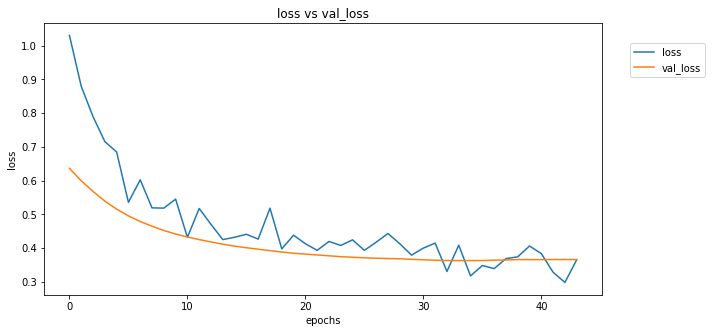

In [111]:
make_eval_graph(eval_pd)    

In [112]:
pred_nn=model.predict(X_test_sc)
pred_nn=np.round(pred_nn).astype(int)
acc_nn=accuracy_score(y_test,pred_nn)
f1_nn=f1_score(y_test,pred_nn)
print(classification_report(y_test,pred_nn))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Table Score

In [116]:
name_classifier=['SVM','LogisticRegression','RandomForestClassifier',
                 'XGBClassifier','LGBMClassifier','Neural Network']
acc_score=[acc_svm,acc_lr,acc_rf,acc_xgb,acc_lgb,acc_nn]
f1_sc=[f1_svm,f1_lr,f1_rf,f1_xgb,f1_lgb,f1_nn]
tab_score=pd.DataFrame({'classifier':name_classifier,'acc_score':acc_score,'f1_score':f1_sc}).sort_values(by='acc_score',ascending=False).reset_index(drop=True)
tab_score

,classifier,acc_score,f1_score
0,XGBClassifier,0.918033,0.920635
1,LGBMClassifier,0.901639,0.909091
2,SVM,0.885246,0.892308
3,Neural Network,0.885246,0.892308
4,RandomForestClassifier,0.868852,0.878788
5,LogisticRegression,0.852459,0.857143
